# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import math
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [7]:
import pandas_profiling as pdp
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns  
import matplotlib.style as style
sns.set(style='darkgrid')
plt.style.use('seaborn-pastel')

# Dataset Overview 

   This research was carried out mainly on the third-year students of the Business School at Suleyman Demirel University. The reason for choosing this kind of participants was that they experienced firsthand online education and how it was dealt with in the SDU. In order to illustrate the impact on the entire population sampling technique was executed. 
   A 5 point Likert scale is a tool used in surveys to assess the diversity of participants' opinions on an area of interest in the form of evaluation questions 
1. Agreement of participation-Yes/No
2. Gender-Female, Male and Prefer not to say
3. Major of studying-Accounting and audit, Finance, Management, Economics and Digital marketing
4. Impact on BS-where 1 is Very low and 5 is Very high
5. Distruption- where 1 is Not at all and 5 is To a great extent
6. Crisis management-where 1 is Inadequate and 5 is Very good
7. Communication efficiency among studends and staff members-where 1 is Not at all and 5 is To a great extent
8. Strategy change in SDU-where 1 is Not at all and 5 is To a great extent
9. Stressfulness-True or False
10. Stress level rate-where 1 is Not at all stressfull and 5 is Extremely stressful
11. Course evaluation-where 1 is Very poor and 5 is Very good
12. Expectations impact-where 1 is Not at all and 5 is To a great extent
13. Connections dynamics among groupmates-where 1 is Very poor and 5 is Very good
14. Academic Freedom affected-where 1 is Much worse and 5 is Much better
15. Rate platforms-where 1 is Very low and 5 is Very high
16. OER-open educational resources, where 1 is Totally useless and 5 is Very useful
17. Support from SDU-where 1 is Never and 5 is A great deal
18. Total-overal sum of points for each observation

# Importing data

In [9]:
DATA_PATH = 'Responses.csv'
df = pd.read_csv(DATA_PATH)

# Data Preprocessing

### Data overview

In [3]:
df.head()

Timestamp  \
0   4/16/2023 1:38:41   
1   4/16/2023 1:52:35   
2  4/16/2023 19:12:39   
3  4/18/2023 14:04:32   
4  4/18/2023 14:09:33   

  I agree to participate for the purpose of the research study.  \
0                                                NaN              
1                                                Yes              
2                                                Yes              
3                                                Yes              
4                                                Yes              

  1. Your gender: 2. Your major of studying:  \
0          Female       Accounting and audit   
1          Female          Digital marketing   
2          Female       Accounting and audit   
3          Female                 Management   
4            Male       Accounting and audit   

   How would you evaluate the impact of COVID-19 on business school faculty?  \
0                                                  5                           
1                                                  4                           
2                                                  3                           
3                                                  5                           
4                                                  5                           

   Has the COVID-19 pandemic disrupted the learning process at your institution?  \
0                                                  5                               
1                                                  4                               
2                                                  4                               
3                                                  3                               
4                                                  3                               

   How would you evaluate the Covid-19 crisis management at your institution? *Crisis management-the process by which a business or other organization deals with a sudden emergency situation.  \
0                                                  3                                                                                                                                              
1                                                  2                                                                                                                                              
2                                                  4                                                                                                                                              
3                                                  3                                                                                                                                              
4                                                  3                                                                                                                                              

   Was communication among and between all staff (academic and administrative) and students effective during the pandemic?   \
0                                                  1                                                                          
1                                                  3                                                                          
2                                                  4                                                                          
3                                                  3                                                                          
4                                                  5                                                                          

   Has the institution's strategy changed to reflect the impact of the pandemic?  \
0                                                  3                               
1                                                  2                             

Renaming columns for the convenience

In [4]:
df_renamed = pd.DataFrame(df)
df_renamed.columns = ['Timestamp', 'Agreements','Gender', 'Major', 'Impact_onBS','Distruption','Crisis_Management','Communication', 'Strategy_ofSDU', 'Stress','Stress_level','Courses_evaluation','Expectations','Connections','Academic_Freedom','Rate_platforms','OER','Support','Total']

In [5]:
df_renamed.head()

Timestamp Agreements  Gender                 Major  Impact_onBS  \
0   4/16/2023 1:38:41        NaN  Female  Accounting and audit            5   
1   4/16/2023 1:52:35        Yes  Female     Digital marketing            4   
2  4/16/2023 19:12:39        Yes  Female  Accounting and audit            3   
3  4/18/2023 14:04:32        Yes  Female            Management            5   
4  4/18/2023 14:09:33        Yes    Male  Accounting and audit            5   

   Distruption  Crisis_Management  Communication  Strategy_ofSDU  Stress  \
0            5                  3              1               3    True   
1            4                  2              3               2    True   
2            4                  4              4               3    True   
3            3                  3              3               3    True   
4            3                  3              5               2    True   

   Stress_level  Courses_evaluation  Expectations  Connections  \
0             5                   2             5            2   
1             4                   1             3            4   
2             3                   4             4            3   
3             3                   3             3            3   
4             3                   4             2            2   

   Academic_Freedom  Rate_platforms  OER  Support  Total  
0                 2               2    3        1     39  
1                 1               4    3        3     38  
2                 3               4    3        4     46  
3                 3               3    3        3     41  
4                 2               4    2        4     41

### Dropping unnecessary columns

In [6]:
df_renamed.drop(['Timestamp', 'Agreements'], axis=1, inplace=True)

In [7]:
df_renamed.head()

Gender                 Major  Impact_onBS  Distruption  Crisis_Management  \
0  Female  Accounting and audit            5            5                  3   
1  Female     Digital marketing            4            4                  2   
2  Female  Accounting and audit            3            4                  4   
3  Female            Management            5            3                  3   
4    Male  Accounting and audit            5            3                  3   

   Communication  Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  \
0              1               3    True             5                   2   
1              3               2    True             4                   1   
2              4               3    True             3                   4   
3              3               3    True             3                   3   
4              5               2    True             3                   4   

   Expectations  Connections  Academic_Freedom  Rate_platforms  OER  Support  \
0             5            2                 2               2    3        1   
1             3            4                 1               4    3        3   
2             4            3                 3               4    3        4   
3             3            3                 3               3    3        3   
4             2            2                 2               4    2        4   

   Total  
0     39  
1     38  
2     46  
3     41  
4     41

### Checking missing values in data

In [8]:
print('Missing values:')
print(df_renamed.isnull().sum())
print('Data shape: ', df_renamed.shape)

Missing values:
Gender                0
Major                 0
Impact_onBS           0
Distruption           0
Crisis_Management     0
Communication         0
Strategy_ofSDU        0
Stress                0
Stress_level          0
Courses_evaluation    0
Expectations          0
Connections           0
Academic_Freedom      0
Rate_platforms        0
OER                   0
Support               0
Total                 0
dtype: int64
Data shape:  (110, 17)


# Profile of the dataset

In [28]:
pdp.ProfileReport(a)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As it was shown in the report the preprocessing was successful and the dataset contains 16 categorical variables, 2 boolean, 1 numeric and 107 observations.

### Encoding Major, Gender and Stress categorical columns

LabelEncoder is used to encode the 'Major' column of the 'df_renamed'. The resulting encoded labels are stored in the 'major_labels' variable.

In [9]:
enconder = LabelEncoder()
major_labels = enconder.fit_transform(df_renamed['Major'])
major_mappings = {index: label for index, label in enumerate(enconder.classes_)}

print(major_mappings)

{0: 'Accounting and audit', 1: 'Digital marketing', 2: 'Economics', 3: 'Finance', 4: 'Management'}


Replacing the 'Major' column in the 'df_renamed' with 'major_labels'.

In [10]:
df_renamed['Major'] = major_labels

In [11]:
df_renamed.head()

Gender  Major  Impact_onBS  Distruption  Crisis_Management  Communication  \
0  Female      0            5            5                  3              1   
1  Female      1            4            4                  2              3   
2  Female      0            3            4                  4              4   
3  Female      4            5            3                  3              3   
4    Male      0            5            3                  3              5   

   Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  Expectations  \
0               3    True             5                   2             5   
1               2    True             4                   1             3   
2               3    True             3                   4             4   
3               3    True             3                   3             3   
4               2    True             3                   4             2   

   Connections  Academic_Freedom  Rate_platforms  OER  Support  Total  
0            2                 2               2    3        1     39  
1            4                 1               4    3        3     38  
2            3                 3               4    3        4     46  
3            3                 3               3    3        3     41  
4            2                 2               4    2        4     41

LabelEncoder is used to encode the 'Gender' column of the 'df_renamed'. The resulting encoded labels are stored in the 'gender_labels' variable.

In [12]:
enconder = LabelEncoder()
gender_labels = enconder.fit_transform(df_renamed['Gender'])
gender_mappings = {index: label for index, label in enumerate(enconder.classes_)}

print(gender_mappings)

{0: 'Female', 1: 'Male', 2: 'Prefer not to say'}


Replacing the 'Gender' column in the 'df_renamed' with 'gender_labels'.

In [13]:
df_renamed['Gender'] = gender_labels

In [14]:
df_renamed.head()

Gender  Major  Impact_onBS  Distruption  Crisis_Management  Communication  \
0       0      0            5            5                  3              1   
1       0      1            4            4                  2              3   
2       0      0            3            4                  4              4   
3       0      4            5            3                  3              3   
4       1      0            5            3                  3              5   

   Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  Expectations  \
0               3    True             5                   2             5   
1               2    True             4                   1             3   
2               3    True             3                   4             4   
3               3    True             3                   3             3   
4               2    True             3                   4             2   

   Connections  Academic_Freedom  Rate_platforms  OER  Support  Total  
0            2                 2               2    3        1     39  
1            4                 1               4    3        3     38  
2            3                 3               4    3        4     46  
3            3                 3               3    3        3     41  
4            2                 2               4    2        4     41

LabelEncoder is used to encode the 'Stress' column of the 'df_renamed'. The resulting encoded labels are stored in the 'stress_labels' variable.

In [15]:
enconder = LabelEncoder()
stress_labels = enconder.fit_transform(df_renamed['Stress'])
stress_mappings = {index: label for index, label in enumerate(enconder.classes_)}

print(stress_mappings)

{0: False, 1: True}


Replacing the 'Stress' column in the 'df_renamed' with 'stress_labels'.

In [16]:
df_renamed['Stress'] = stress_labels

In [17]:
df_renamed.head()

Gender  Major  Impact_onBS  Distruption  Crisis_Management  Communication  \
0       0      0            5            5                  3              1   
1       0      1            4            4                  2              3   
2       0      0            3            4                  4              4   
3       0      4            5            3                  3              3   
4       1      0            5            3                  3              5   

   Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  Expectations  \
0               3       1             5                   2             5   
1               2       1             4                   1             3   
2               3       1             3                   4             4   
3               3       1             3                   3             3   
4               2       1             3                   4             2   

   Connections  Academic_Freedom  Rate_platforms  OER  Support  Total  
0            2                 2               2    3        1     39  
1            4                 1               4    3        3     38  
2            3                 3               4    3        4     46  
3            3                 3               3    3        3     41  
4            2                 2               4    2        4     41

### Adding score_bracket column

<AxesSubplot: xlabel='Impact_onBS', ylabel='Density'>

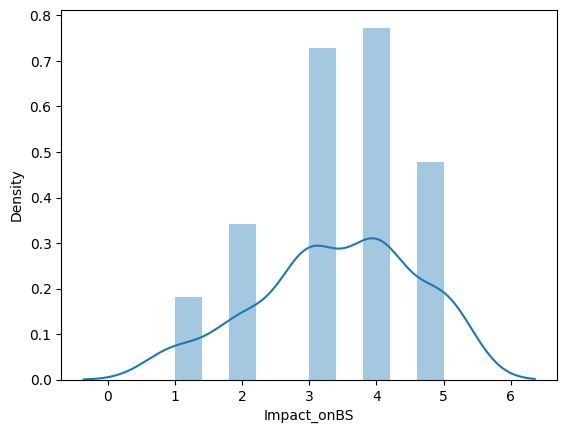

In [18]:
sns.distplot(df_renamed['Impact_onBS'])

In [19]:
df_renamed.Impact_onBS.mean()
df_renamed['score_bracket'] = np.where(df_renamed['Impact_onBS'] >= 2, '1', '0')

In [20]:
df_renamed.head()

Gender  Major  Impact_onBS  Distruption  Crisis_Management  Communication  \
0       0      0            5            5                  3              1   
1       0      1            4            4                  2              3   
2       0      0            3            4                  4              4   
3       0      4            5            3                  3              3   
4       1      0            5            3                  3              5   

   Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  Expectations  \
0               3       1             5                   2             5   
1               2       1             4                   1             3   
2               3       1             3                   4             4   
3               3       1             3                   3             3   
4               2       1             3                   4             2   

   Connections  Academic_Freedom  Rate_platforms  OER  Support  Total  \
0            2                 2               2    3        1     39   
1            4                 1               4    3        3     38   
2            3                 3               4    3        4     46   
3            3                 3               3    3        3     41   
4            2                 2               4    2        4     41   

  score_bracket  
0             1  
1             1  
2             1  
3             1  
4             1

### Normalization of numerical columns using MinMaxScaler

In [21]:
df_renamed['Impact_onBS'] = MinMaxScaler().fit_transform(np.array(df_renamed['Impact_onBS']).reshape(-1,1))
df_renamed['Distruption'] = MinMaxScaler().fit_transform(np.array(df_renamed['Distruption']).reshape(-1,1))
df_renamed['Crisis_Management'] = MinMaxScaler().fit_transform(np.array(df_renamed['Crisis_Management']).reshape(-1,1))
df_renamed['Communication'] = MinMaxScaler().fit_transform(np.array(df_renamed['Communication']).reshape(-1,1))
df_renamed['Strategy_ofSDU'] = MinMaxScaler().fit_transform(np.array(df_renamed['Strategy_ofSDU']).reshape(-1,1))
df_renamed['Stress_level'] = MinMaxScaler().fit_transform(np.array(df_renamed['Stress_level']).reshape(-1,1))
df_renamed['Courses_evaluation'] = MinMaxScaler().fit_transform(np.array(df_renamed['Courses_evaluation']).reshape(-1,1))
df_renamed['Expectations'] = MinMaxScaler().fit_transform(np.array(df_renamed['Expectations']).reshape(-1,1))
df_renamed['Connections'] = MinMaxScaler().fit_transform(np.array(df_renamed['Connections']).reshape(-1,1))
df_renamed['Academic_Freedom'] = MinMaxScaler().fit_transform(np.array(df_renamed['Academic_Freedom']).reshape(-1,1))
df_renamed['Rate_platforms'] = MinMaxScaler().fit_transform(np.array(df_renamed['Rate_platforms']).reshape(-1,1))
df_renamed['OER'] = MinMaxScaler().fit_transform(np.array(df_renamed['OER']).reshape(-1,1))
df_renamed['Support'] = MinMaxScaler().fit_transform(np.array(df_renamed['Support']).reshape(-1,1))
df_renamed['Total'] = MinMaxScaler().fit_transform(np.array(df_renamed['Total']).reshape(-1,1))

In [22]:
df_renamed.head()

Gender  Major  Impact_onBS  Distruption  Crisis_Management  Communication  \
0       0      0         1.00         1.00               0.50           0.00   
1       0      1         0.75         0.75               0.25           0.50   
2       0      0         0.50         0.75               0.75           0.75   
3       0      4         1.00         0.50               0.50           0.50   
4       1      0         1.00         0.50               0.50           1.00   

   Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  Expectations  \
0            0.50       1          1.00                0.25          1.00   
1            0.25       1          0.75                0.00          0.50   
2            0.50       1          0.50                0.75          0.75   
3            0.50       1          0.50                0.50          0.50   
4            0.25       1          0.50                0.75          0.25   

   Connections  Academic_Freedom  Rate_platforms   OER  Support     Total  \
0         0.25              0.25            0.25  0.50     0.00  0.500000   
1         0.75              0.00            0.75  0.50     0.50  0.480769   
2         0.50              0.50            0.75  0.50     0.75  0.634615   
3         0.50              0.50            0.50  0.50     0.50  0.538462   
4         0.25              0.25            0.75  0.25     0.75  0.538462   

  score_bracket  
0             1  
1             1  
2             1  
3             1  
4             1

#### Heatmap

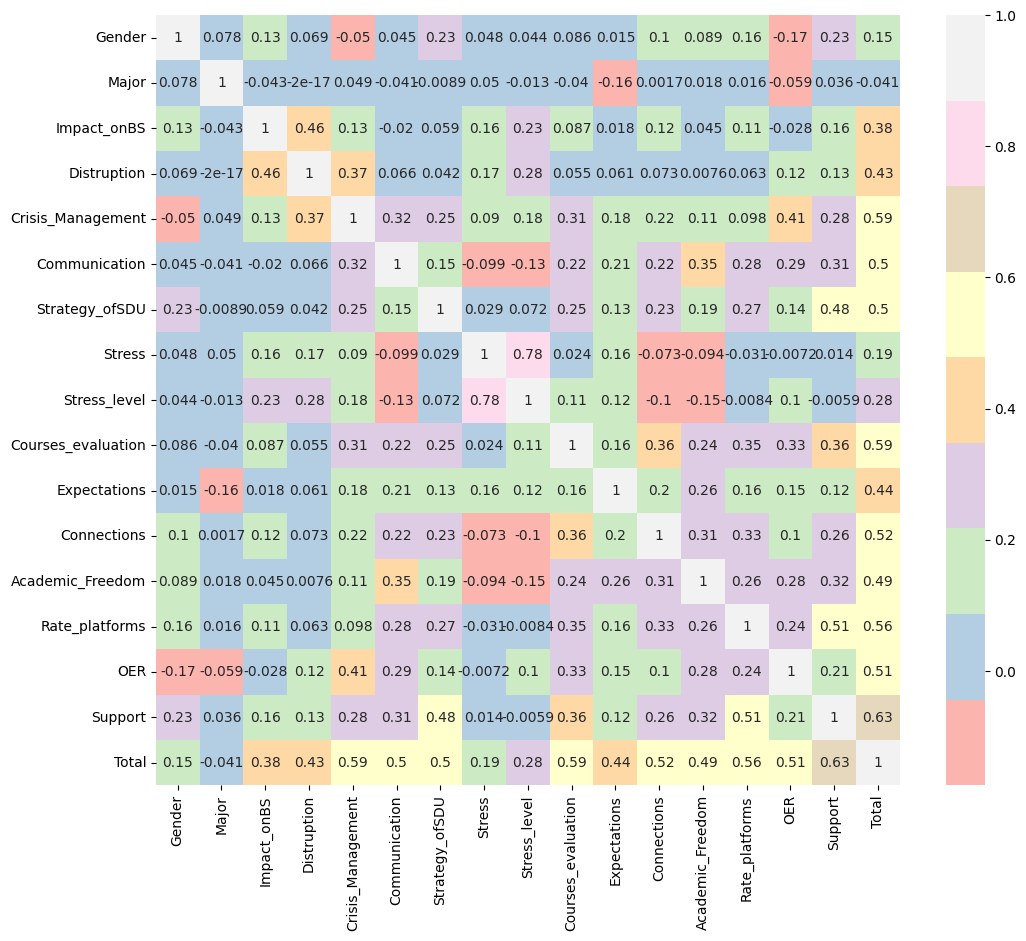

In [23]:
plt.figure(figsize=(12,10))
cor = df_renamed.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Pastel1)
plt.show()

# 1 Supervised Learning - Random Forest

### 1.1 Selecting feature columns and target column

In [24]:
feature_cols = ['Communication', 'Courses_evaluation', 'Expectations', 'Connections', 
                       'Academic_Freedom', 'Rate_platforms', 'OER']

features = df_renamed[feature_cols]
labels = df_renamed['score_bracket']

### 1.2 Splitting data into train and test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15, random_state=42)

### 1.3 Setting parameters for Random Forest Model

In [26]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [27]:
train_acc = rfc.score(X_train, y_train)
test_acc = rfc.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.989247311827957
Test accuracy: 0.9411764705882353


### 1.4 Detecting underfitting/overfitting

The model seems to be performing well and not overfitting or underfitting significantly. But let's see what parameters can be suggested.

### 1.5 Hyperparameter tuning 

We can do hyperparameter tuning using GridSearchCV on a Random Forest Classifier (rfc). The parameters dictionary specifies the hyperparameters to be tuned, where n_estimators represents the number of decision trees in the forest and max_depth represents the maximum depth of each decision tree. The values [10, 30, 100] and [3, 5, 7, None] represent different possible values for these hyperparameters to be tested during the tuning process.

The GridSearchCV function takes in the classifier (rfc), the dictionary of hyperparameters (parameters), and a value for cv which represents the number of cross-validation folds to be used during the tuning process. The fit method is then called on the cv object with the training data (X_train and y_train) to perform the tuning process. After the process is completed, the best hyperparameters can be accessed using cv.best_params_.

In [28]:
parameters = {'n_estimators':[10, 30, 100], 'max_depth':[3,5,7, None]}

In [29]:
cv = GridSearchCV(rfc,parameters,cv=2)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=7, random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'n_estimators': [10, 30, 100]})

In [30]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print('\n')
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,4)} + or -{round(std,4)} for the {params}')

In [31]:
display(cv)

Best parameters are: {'max_depth': 3, 'n_estimators': 10}


0.9248 + or -0.0099 for the {'max_depth': 3, 'n_estimators': 10}
0.9248 + or -0.0099 for the {'max_depth': 3, 'n_estimators': 30}
0.9248 + or -0.0099 for the {'max_depth': 3, 'n_estimators': 100}
0.9248 + or -0.0099 for the {'max_depth': 5, 'n_estimators': 10}
0.9248 + or -0.0099 for the {'max_depth': 5, 'n_estimators': 30}
0.9248 + or -0.0099 for the {'max_depth': 5, 'n_estimators': 100}
0.8714 + or -0.0416 for the {'max_depth': 7, 'n_estimators': 10}
0.8714 + or -0.0416 for the {'max_depth': 7, 'n_estimators': 30}
0.8823 + or -0.0525 for the {'max_depth': 7, 'n_estimators': 100}
0.8714 + or -0.0416 for the {'max_depth': None, 'n_estimators': 10}
0.8714 + or -0.0416 for the {'max_depth': None, 'n_estimators': 30}
0.8823 + or -0.0525 for the {'max_depth': None, 'n_estimators': 100}


### 1.6 Evaluation Metrics

In [32]:
rf_new = RandomForestClassifier(n_estimators=10, max_depth=3)
rf_new.fit(X_train, y_train)

train_acc = rf_new.score(X_train, y_train)
test_acc = rf_new.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.9247311827956989
Test accuracy: 0.9411764705882353


In [33]:
for name, importance in zip(features.columns, rf_new.feature_importances_):
    print(name, '=', importance)

Communication = 0.12448724511607948
Courses_evaluation = 0.11088696001027702
Expectations = 0.14284095219559528
Connections = 0.16751640465471745
Academic_Freedom = 0.13057345494046654
Rate_platforms = 0.13155844675445935
OER = 0.19213653632840488


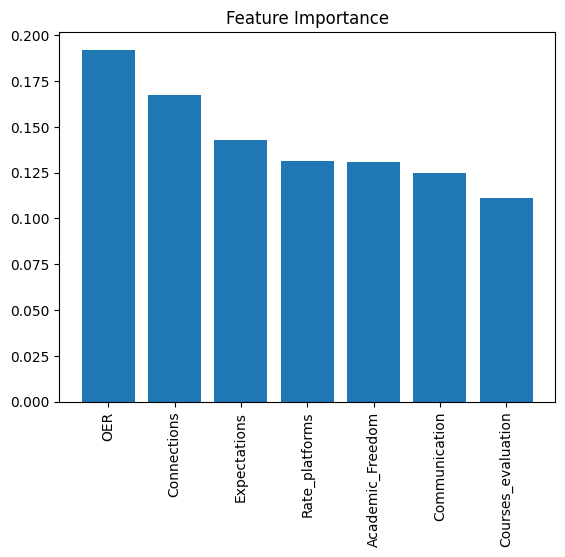

In [34]:
importances = rf_new.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)

plt.show()

In [35]:
from sklearn.metrics import classification_report
y_pred = rf_new.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17



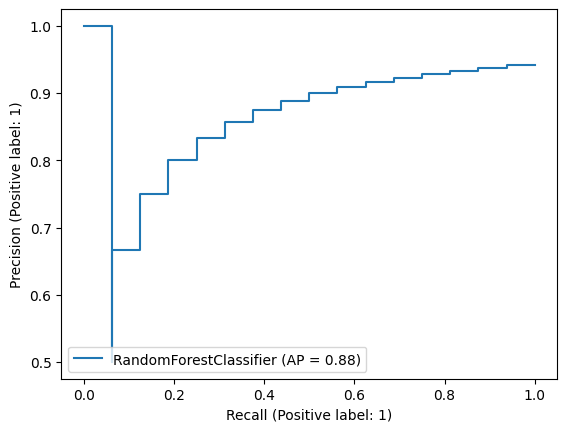

In [36]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rf_new, X_test, y_test)
plt.show()

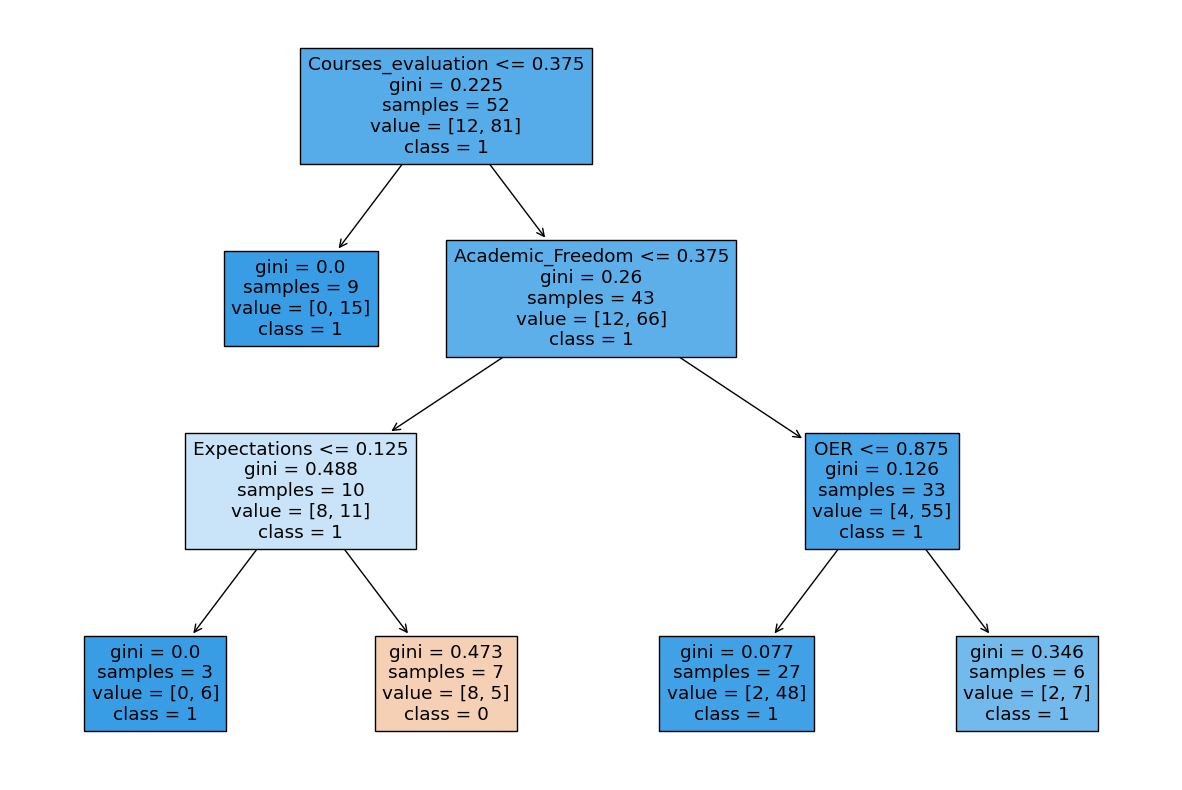

In [37]:
plt.figure(figsize=(15,10))
plot_tree(rf_new.estimators_[0], feature_names=feature_cols, class_names=["0", "1"], filled=True)
plt.show()

# 2 Unsupervised Learning - Kmeans Clustering

### 2.1 Selecting features

In [38]:
X = df_renamed[['Gender', 'Major', 'Impact_onBS', 'Distruption', 'Crisis_Management', 
                'Communication', 'Strategy_ofSDU', 'Stress', 'Stress_level', 'Courses_evaluation', 
                'Expectations', 'Connections', 'Academic_Freedom', 'Rate_platforms', 
               'OER', 'Support', 'Total', 'score_bracket']]

### 2.2 Finding the Optimal Number of Clusters in K-Means

We are using the Elbow method here. For each value of K (that varies from 1 to 10), we are calculating WCSS (Within-Cluster Sum of Square). The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

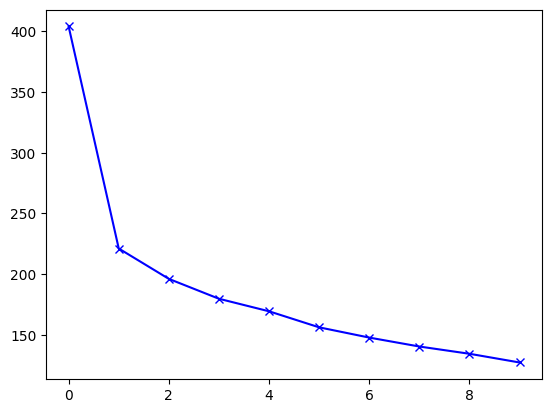

In [40]:
plt.plot(wcss, 'bx-')

### 2.3 Selecting three clusters

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
labels=kmeans.labels_

In [42]:
clusters = pd.concat([df_renamed, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

Gender  Major  Impact_onBS  Distruption  Crisis_Management  Communication  \
0       0      0         1.00         1.00               0.50           0.00   
1       0      1         0.75         0.75               0.25           0.50   
2       0      0         0.50         0.75               0.75           0.75   
3       0      4         1.00         0.50               0.50           0.50   
4       1      0         1.00         0.50               0.50           1.00   

   Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  Expectations  \
0            0.50       1          1.00                0.25          1.00   
1            0.25       1          0.75                0.00          0.50   
2            0.50       1          0.50                0.75          0.75   
3            0.50       1          0.50                0.50          0.50   
4            0.25       1          0.50                0.75          0.25   

   Connections  Academic_Freedom  Rate_platforms   OER  Support     Total  \
0         0.25              0.25            0.25  0.50     0.00  0.500000   
1         0.75              0.00            0.75  0.50     0.50  0.480769   
2         0.50              0.50            0.75  0.50     0.75  0.634615   
3         0.50              0.50            0.50  0.50     0.50  0.538462   
4         0.25              0.25            0.75  0.25     0.75  0.538462   

  score_bracket  cluster  
0             1        1  
1             1        2  
2             1        1  
3             1        0  
4             1        1

### 2.4 Analysis of clusters

Iterating through clusters. Overall most of the responds are came from Female and Finance.\
**Cluster 0**: Well-satisfied. Students that gave 3 and 4 points. Most of the are from Finance and Management. \
**Cluster 1**: Poorly-satisfied. Students that gave 3 points to the most of the questions. Largest numbers of students are from Accounting and audit. \
**Cluster 2**: Most-satisfied. Students that gave 3 - 5 points to the most of the questions. Most of them are from Digital Marketing and Economics.

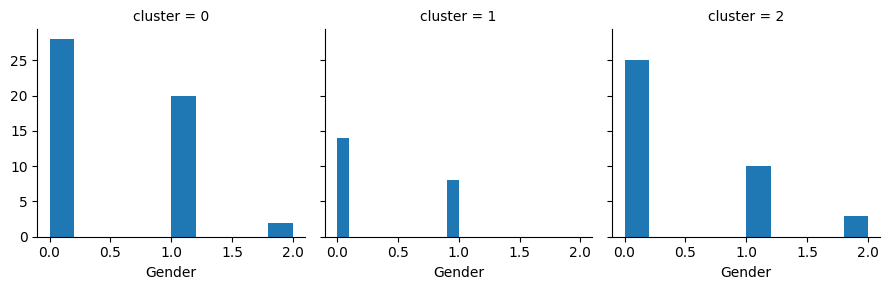

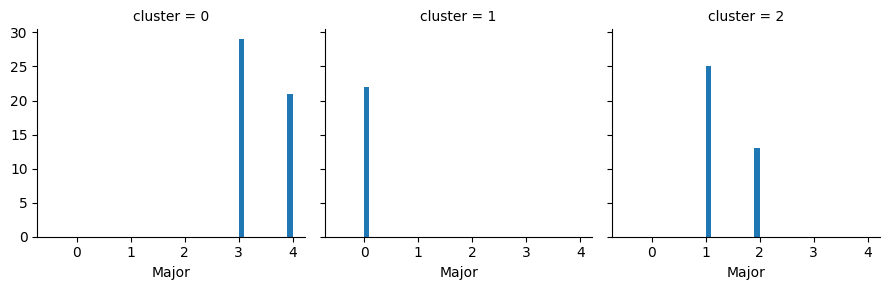

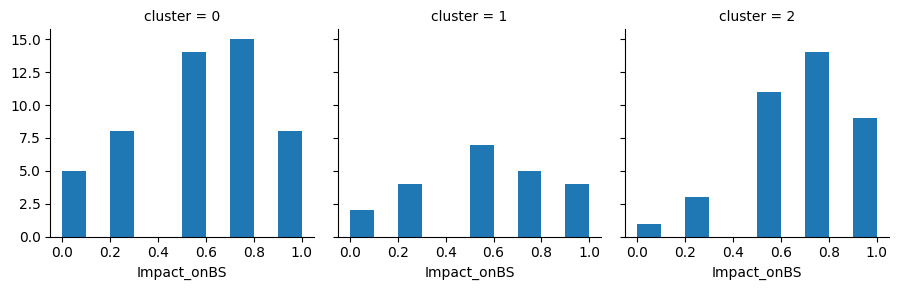

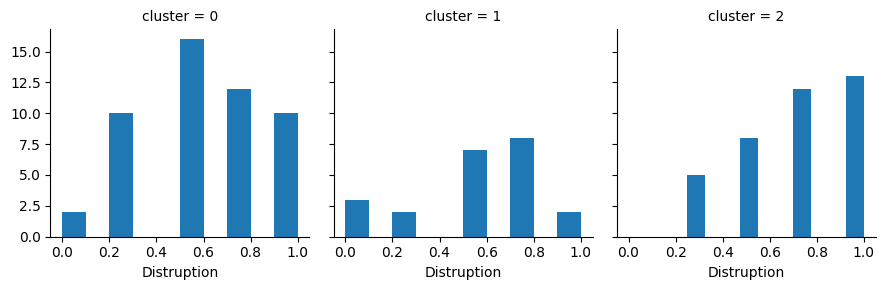

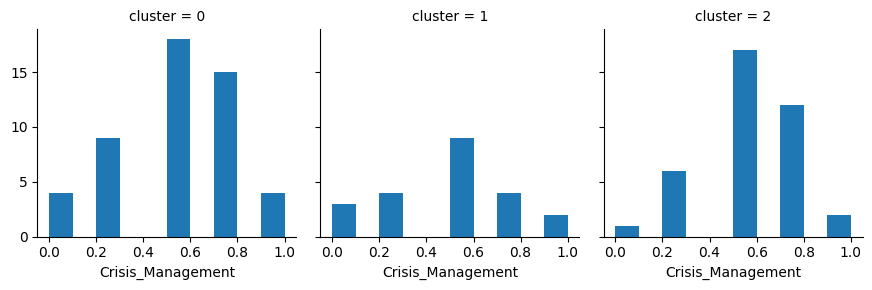

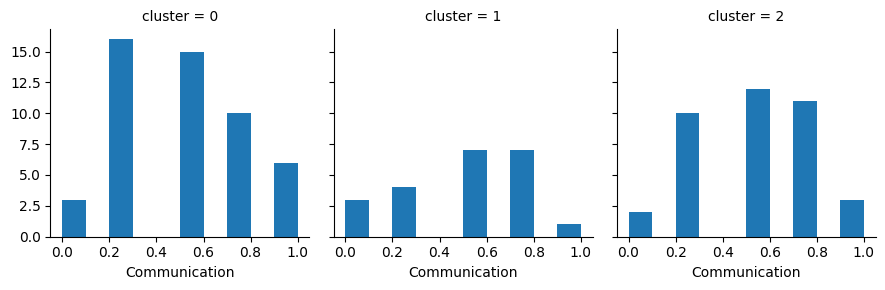

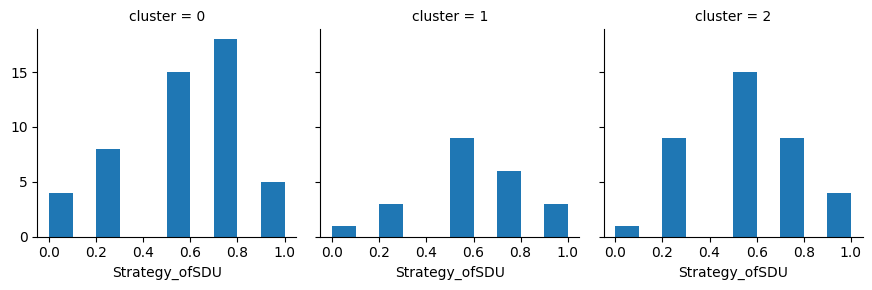

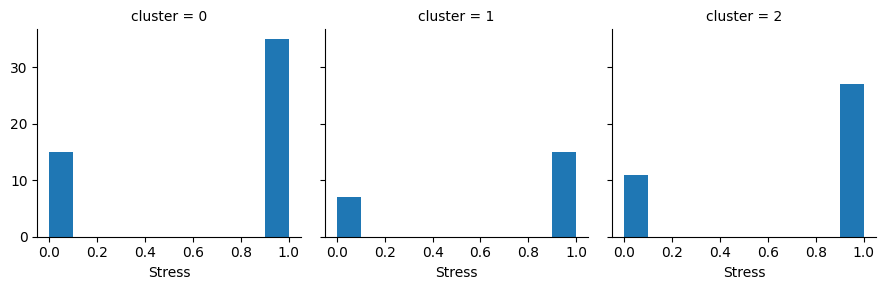

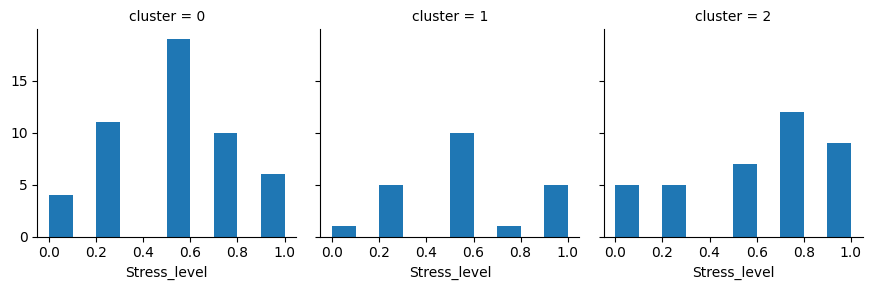

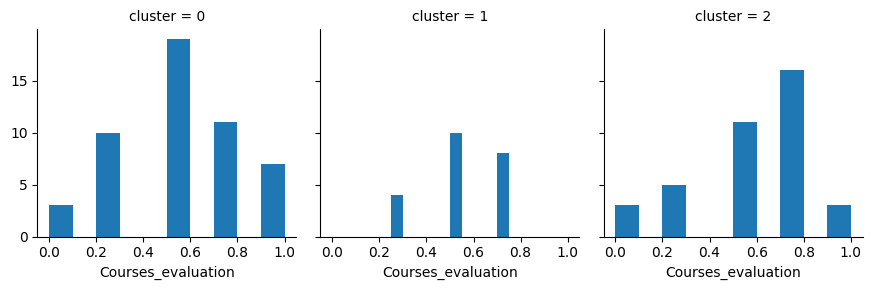

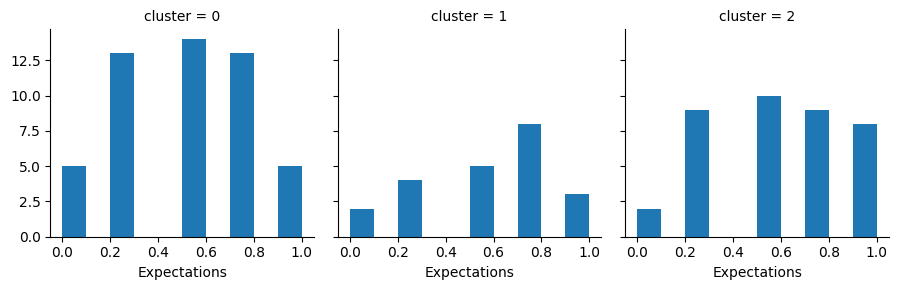

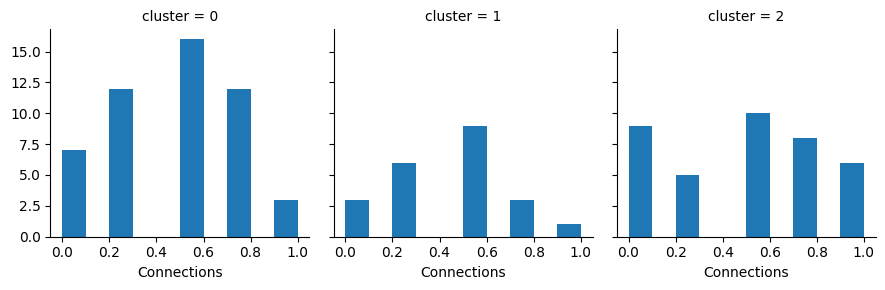

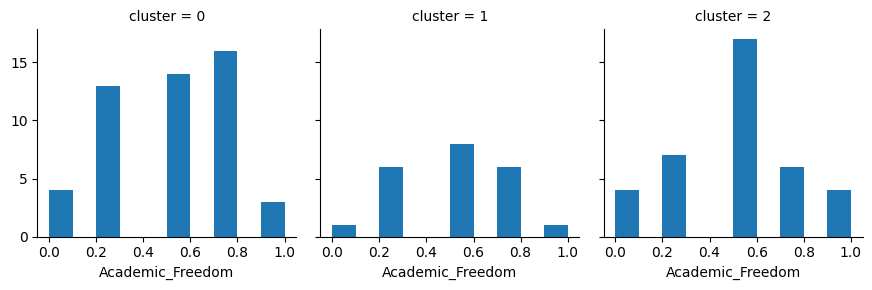

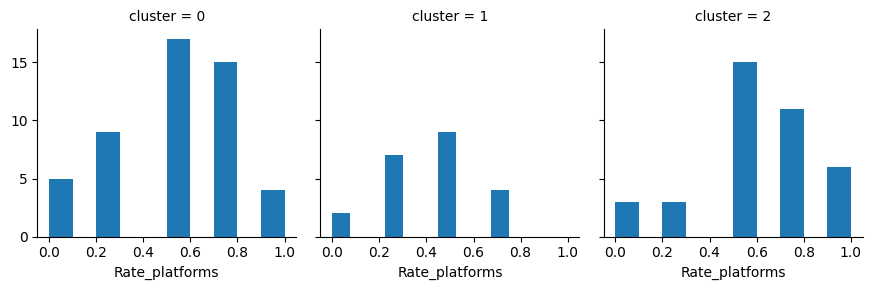

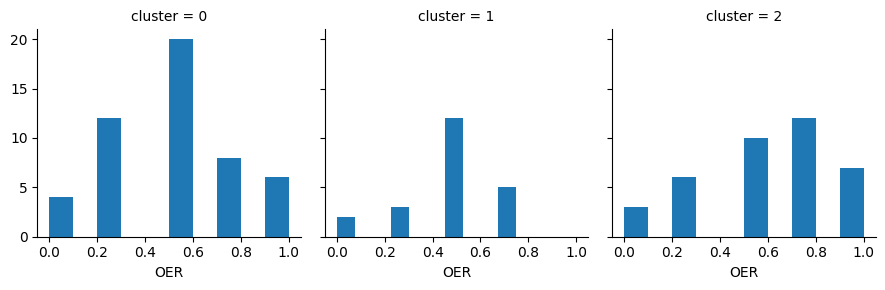

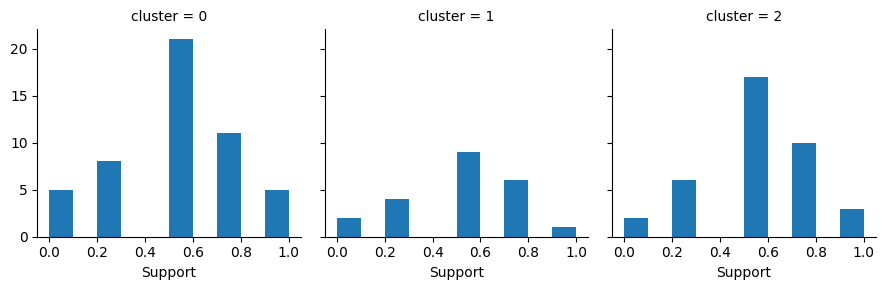

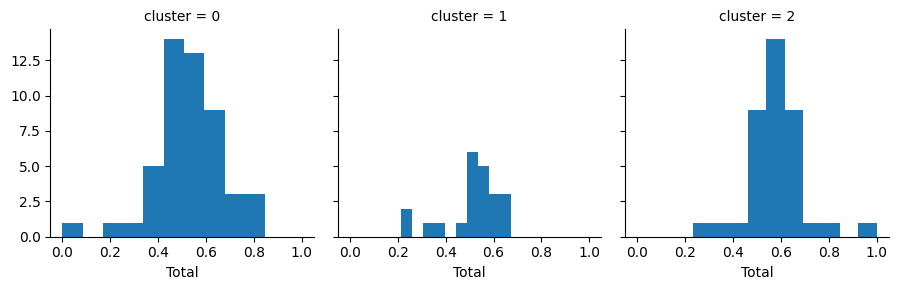

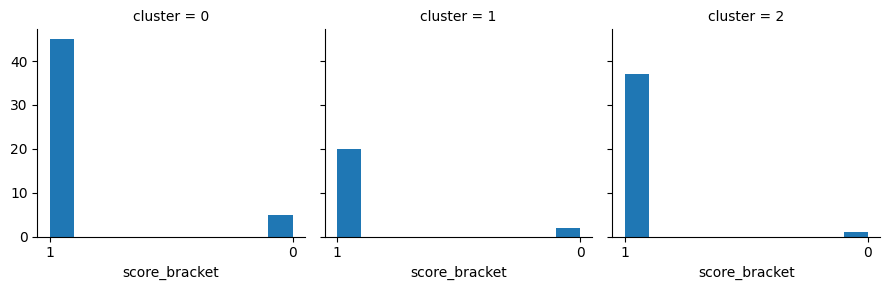

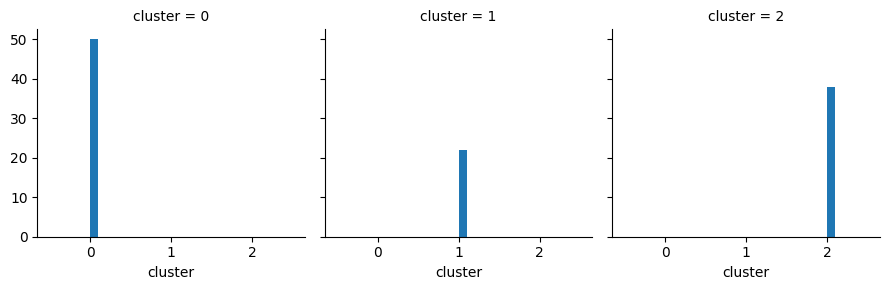

In [43]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
    plt.show()

### 2.5 Visualization of clusters using PCA (Principal Component Analysis)

Transforming data to two dimensions for visualization

In [44]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(110, 2)

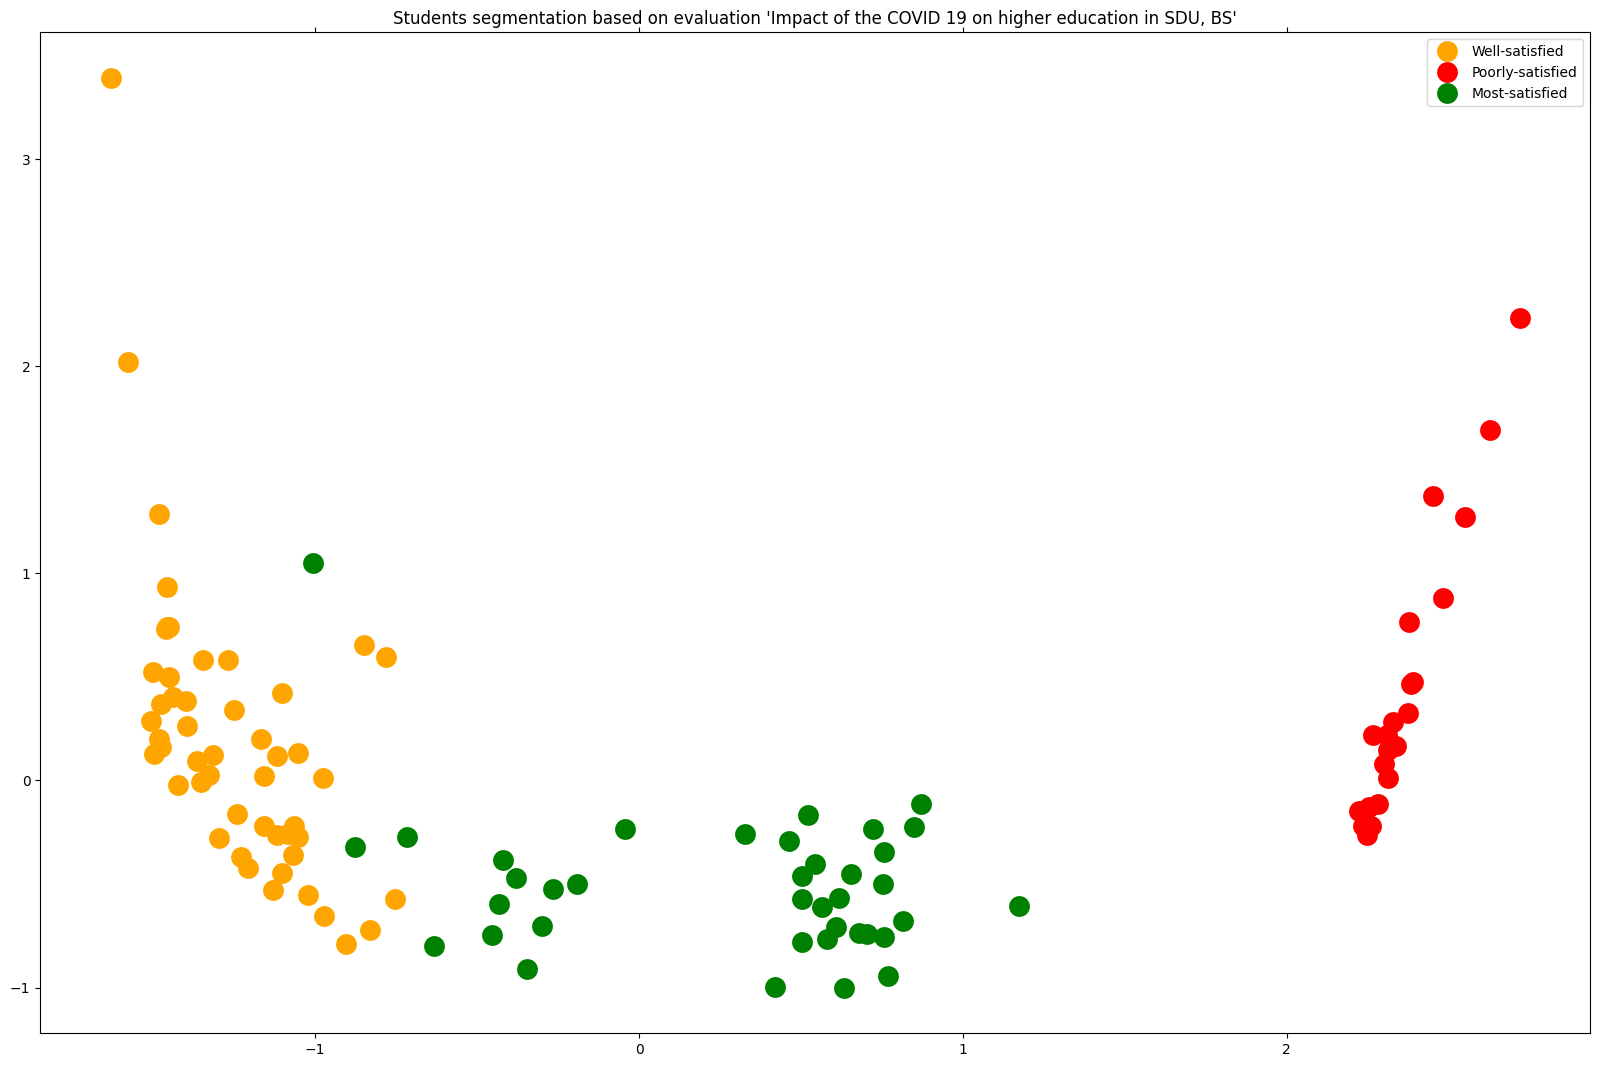

In [45]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'orange',
          1: 'red',
          2: 'green'}

names = {0: 'Well-satisfied', 
         1: 'Poorly-satisfied', 
         2: 'Most-satisfied'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=15,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Students segmentation based on evaluation 'Impact of the COVID 19 on higher education in SDU, BS'")
plt.show()

### 2.6 Detecting Underfitting/Overfitting of model, Hyperparameter tuning, Model optimization, Learning Curves 

The concepts of underfitting and overfitting in machine learning generally refer to the performance of a model on the training data and the generalization of the model to unseen data. However, these concepts do not directly apply to clustering models as they are unsupervised and there is no true output to compare the predicted clusters to.

Hyperparameter tuning: Clustering algorithms have hyperparameters that can be tuned to optimize performance. For example, the number of clusters to be used can greatly impact the results. 

In [46]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X)
labels=kmeans.labels_
clusters = pd.concat([df_renamed, pd.DataFrame({'cluster':labels})], axis=1)
dist = 1 - cosine_similarity(X)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

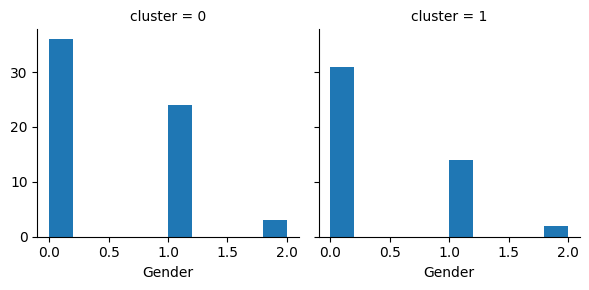

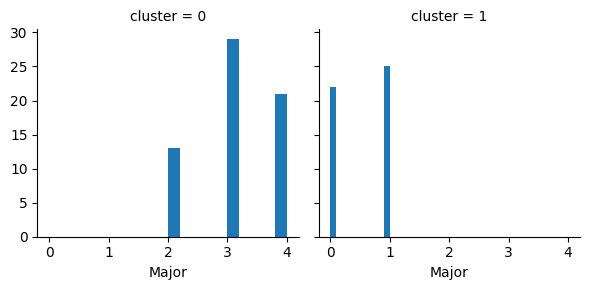

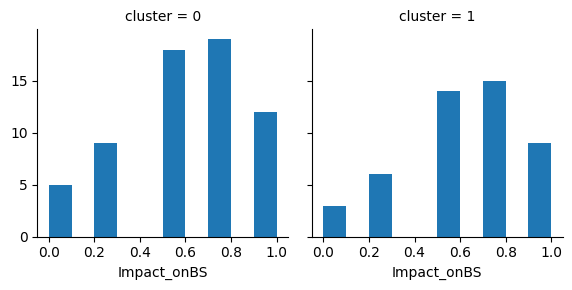

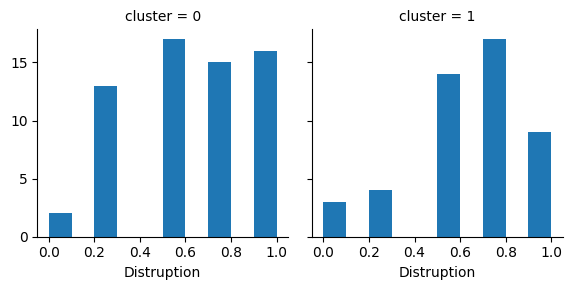

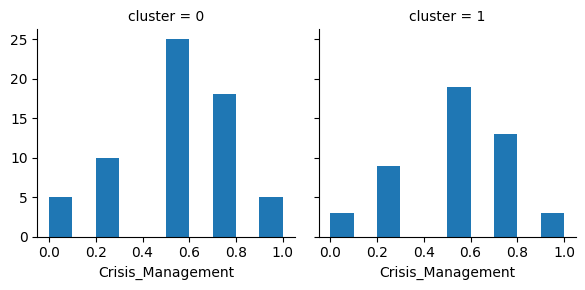

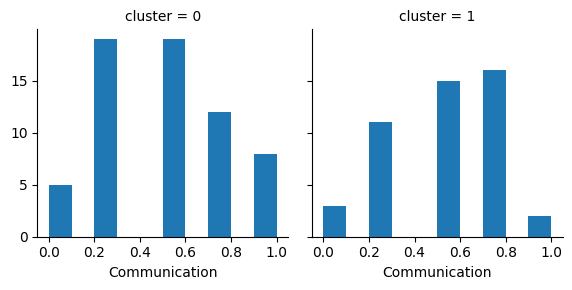

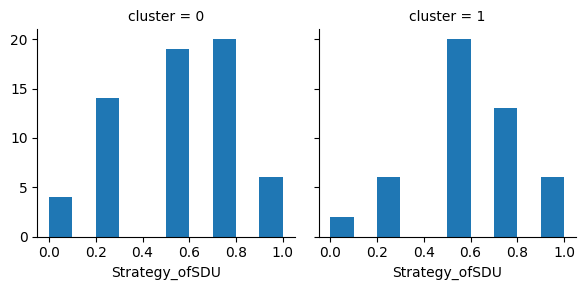

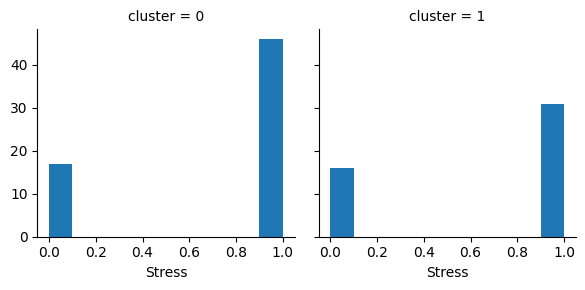

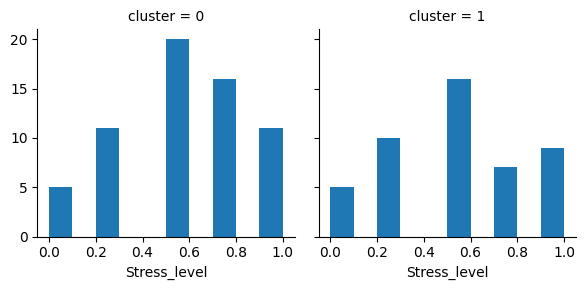

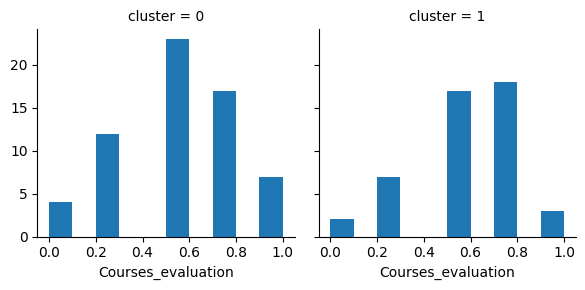

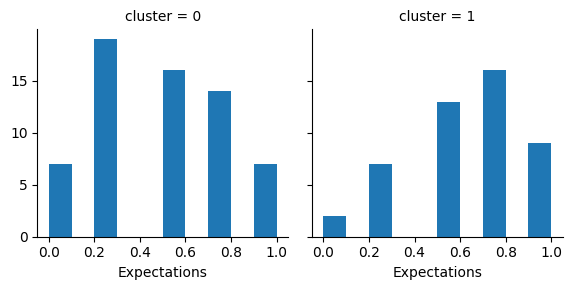

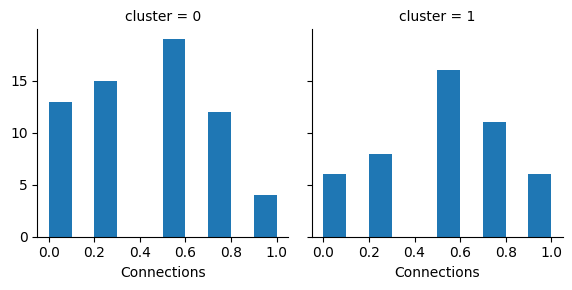

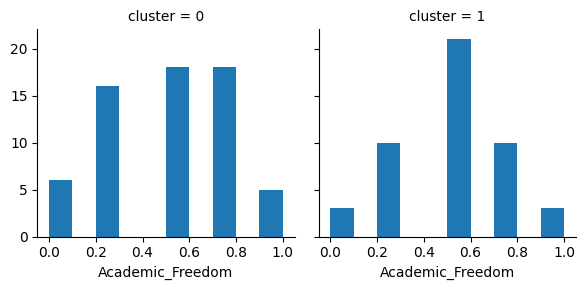

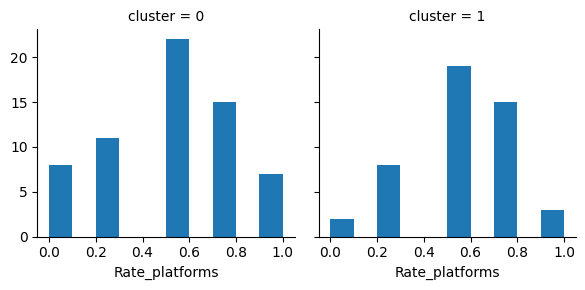

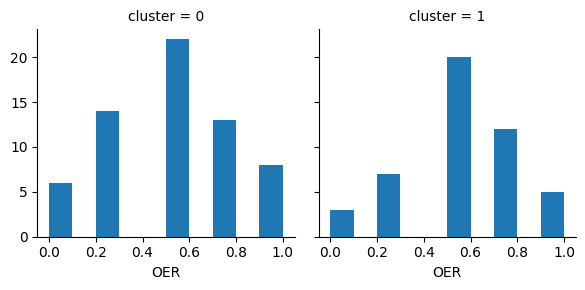

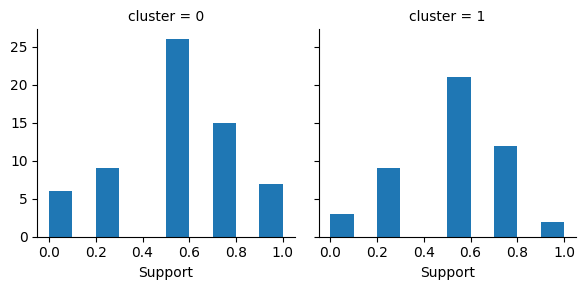

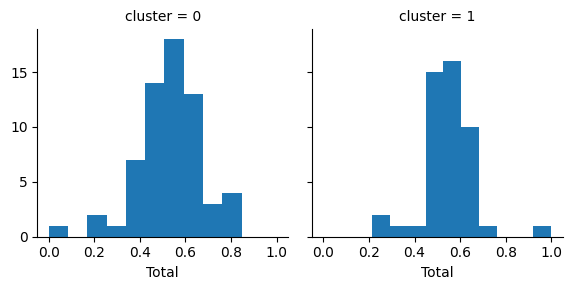

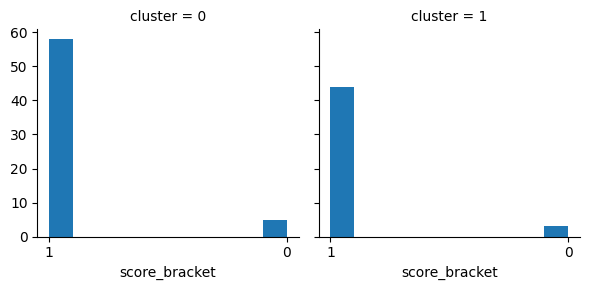

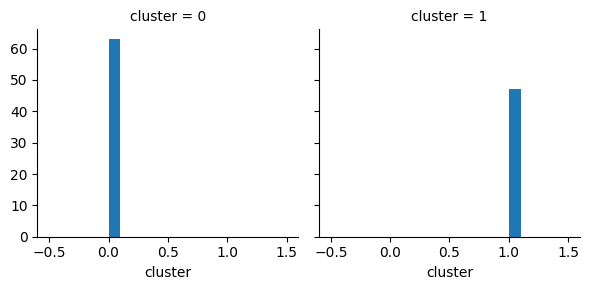

In [47]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
    plt.show()

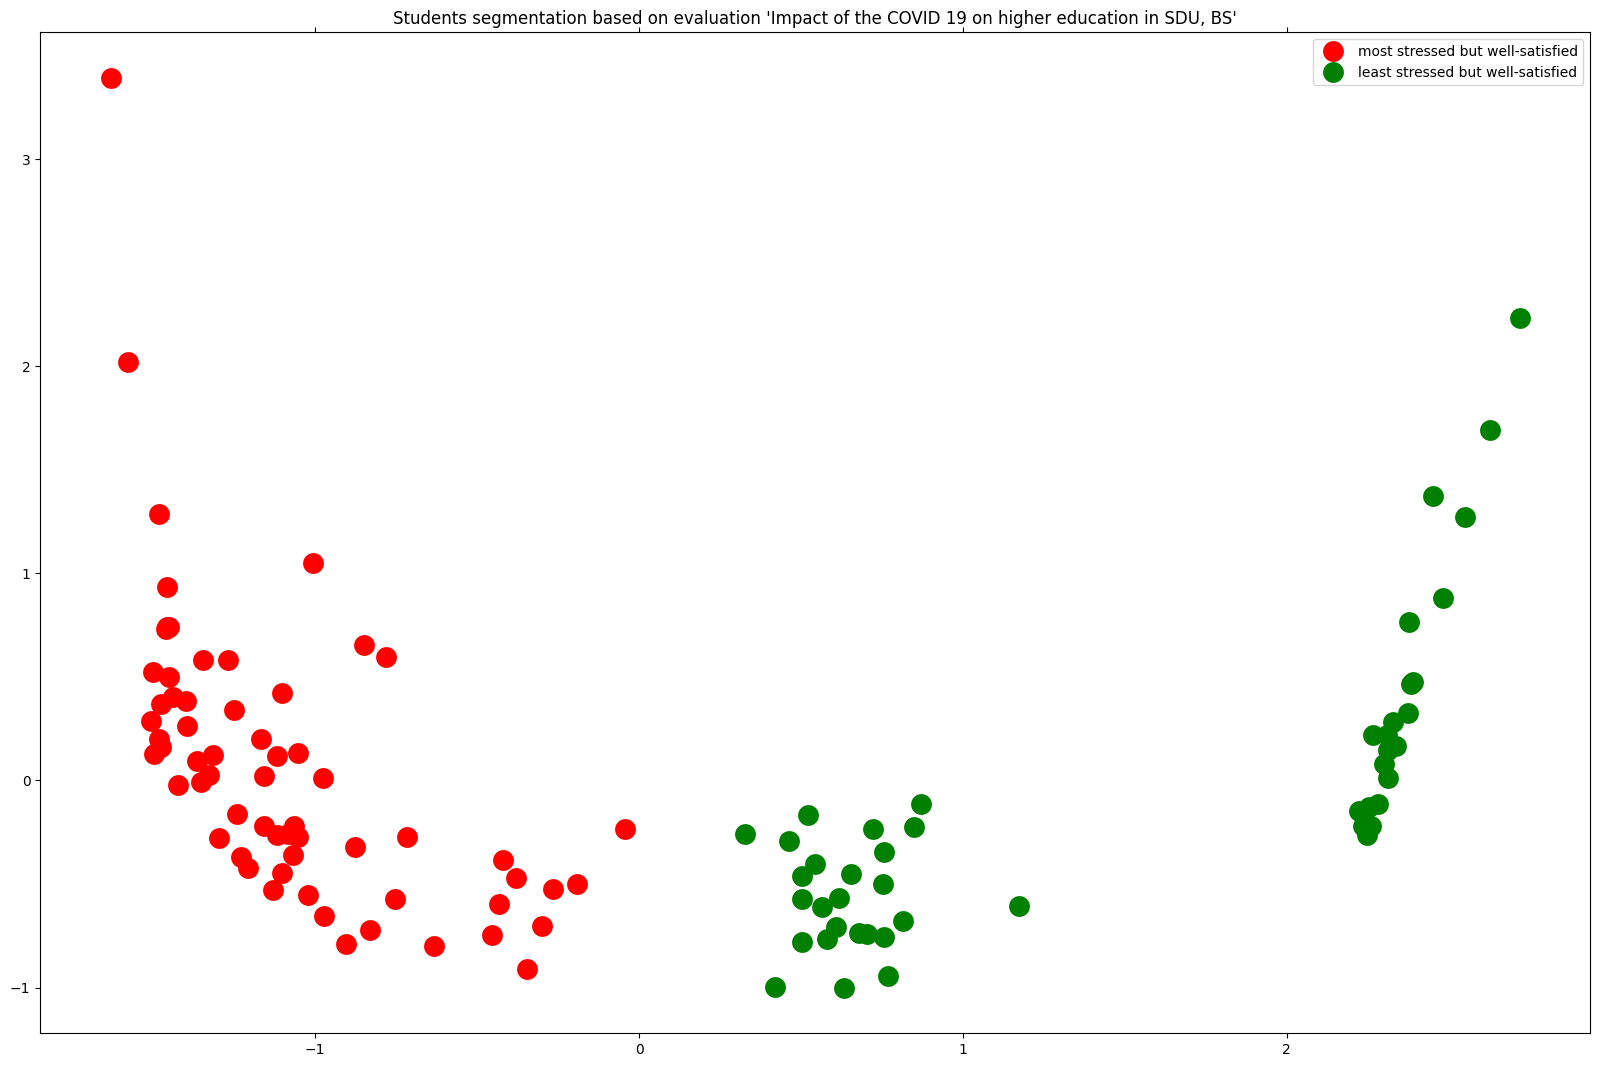

In [48]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'green'}

names = {0: 'most stressed but well-satisfied', 
         1: 'least stressed but well-satisfied'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=15,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Students segmentation based on evaluation 'Impact of the COVID 19 on higher education in SDU, BS'")
plt.show()

As we can see from the plot above, changing number of clusters gave us more information abuot students' segmentation. And intrepretation can be differrent every time since clusterization differs.

Model optimization: Various techniques such as scaling or normalization can be used to optimize the input features to clustering algorithms. But in our case it is already done.

It's worth noting that clustering algorithms are generally more exploratory in nature, and their results are often used to generate hypotheses or identify patterns in the data. As such, the focus is often more on the interpretability and usefulness of the clusters rather than the exact performance metrics.

### 2.7 Evaluation metrics (Learning Curve)

The silhouette score is a metric used to evaluate the quality of clustering results. It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.

Learning curves in clustering can be used to analyze the model's performance as the number of data points and/or the number of clusters increase. \
To create a learning curve for a clustering algorithm, we can vary the number of data points or the number of clusters used and plot the resulting scores against the number of data points/clusters. The score can be any evaluation metric such as silhouette score or within-cluster sum of squares (WSS).

For n_clusters = 2, the average silhouette_score is : 0.36987
For n_clusters = 3, the average silhouette_score is : 0.22439
For n_clusters = 4, the average silhouette_score is : 0.14833
For n_clusters = 5, the average silhouette_score is : 0.15420
For n_clusters = 6, the average silhouette_score is : 0.15940
For n_clusters = 7, the average silhouette_score is : 0.14741
For n_clusters = 8, the average silhouette_score is : 0.14770
For n_clusters = 9, the average silhouette_score is : 0.14714
For n_clusters = 10, the average silhouette_score is : 0.13792


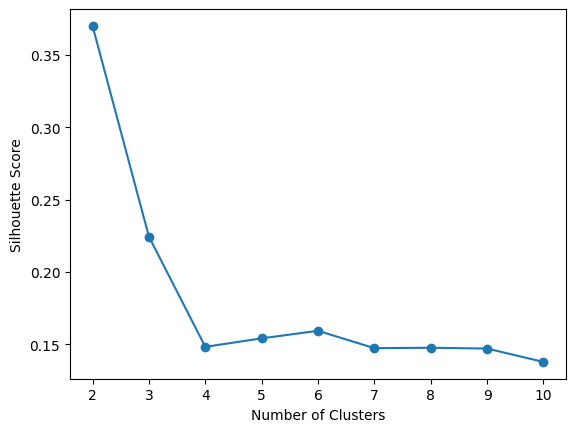

In [49]:
cluster_range = range(2, 11)

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.5f}")

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

As we can see from silhouette scores for each number of clusters, we can say that having 3 clusters are giving good results (0.22439), but 2 is the best from the output right here. So as mentioned earlier, hyperparameter tuning has great impact to the results. Now we can see that after we changed number of clusters to 2, the silhouette score is 0.36987.

# 3 Supervised Learning - Decision Tree

### 3.1 Selecting feature columns and target column

We will select Gender as a target column since this is the only categorical feature that goes well with the accuracy.

In [50]:
feature_cols = ['Major', 'Impact_onBS', 'Distruption', 'Crisis_Management', 
                'Communication', 'Strategy_ofSDU', 'Stress', 'Stress_level', 'Courses_evaluation', 
                'Expectations', 'Connections', 'Academic_Freedom', 'Rate_platforms', 
               'OER', 'Support', 'Total', 'score_bracket']
x = df_renamed[feature_cols]
y = df_renamed['Gender']

### 3.2 Model creation

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.455


### 3.3 Detecting underfitting/overfitting

From the previous results we can see that this is overfitting because the training accuracy is high (1.000) but the testing accuracy is low (0.409). 

To address overfitting, we tried reducing the max_depth to 5.

In [53]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.795
Accuracy on test set: 0.591


### 3.4 Hyperparameter tuning

But this, perhaps, is not the best result yet. Let's change the number of test_size to 0.1, max_depth to 7 and min_samples_split to 2.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [55]:
tree = DecisionTreeClassifier(max_depth=7, min_samples_split=2, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.919
Accuracy on test set: 0.636


This is still not the best result but test accuracy reached highest peak at 0.636.

### 3.5 Decision tree

Visualizing a decision tree can help in understanding how the model is making decisions, how the input features are being used to split the data, and which features are the most important for making the decisions.

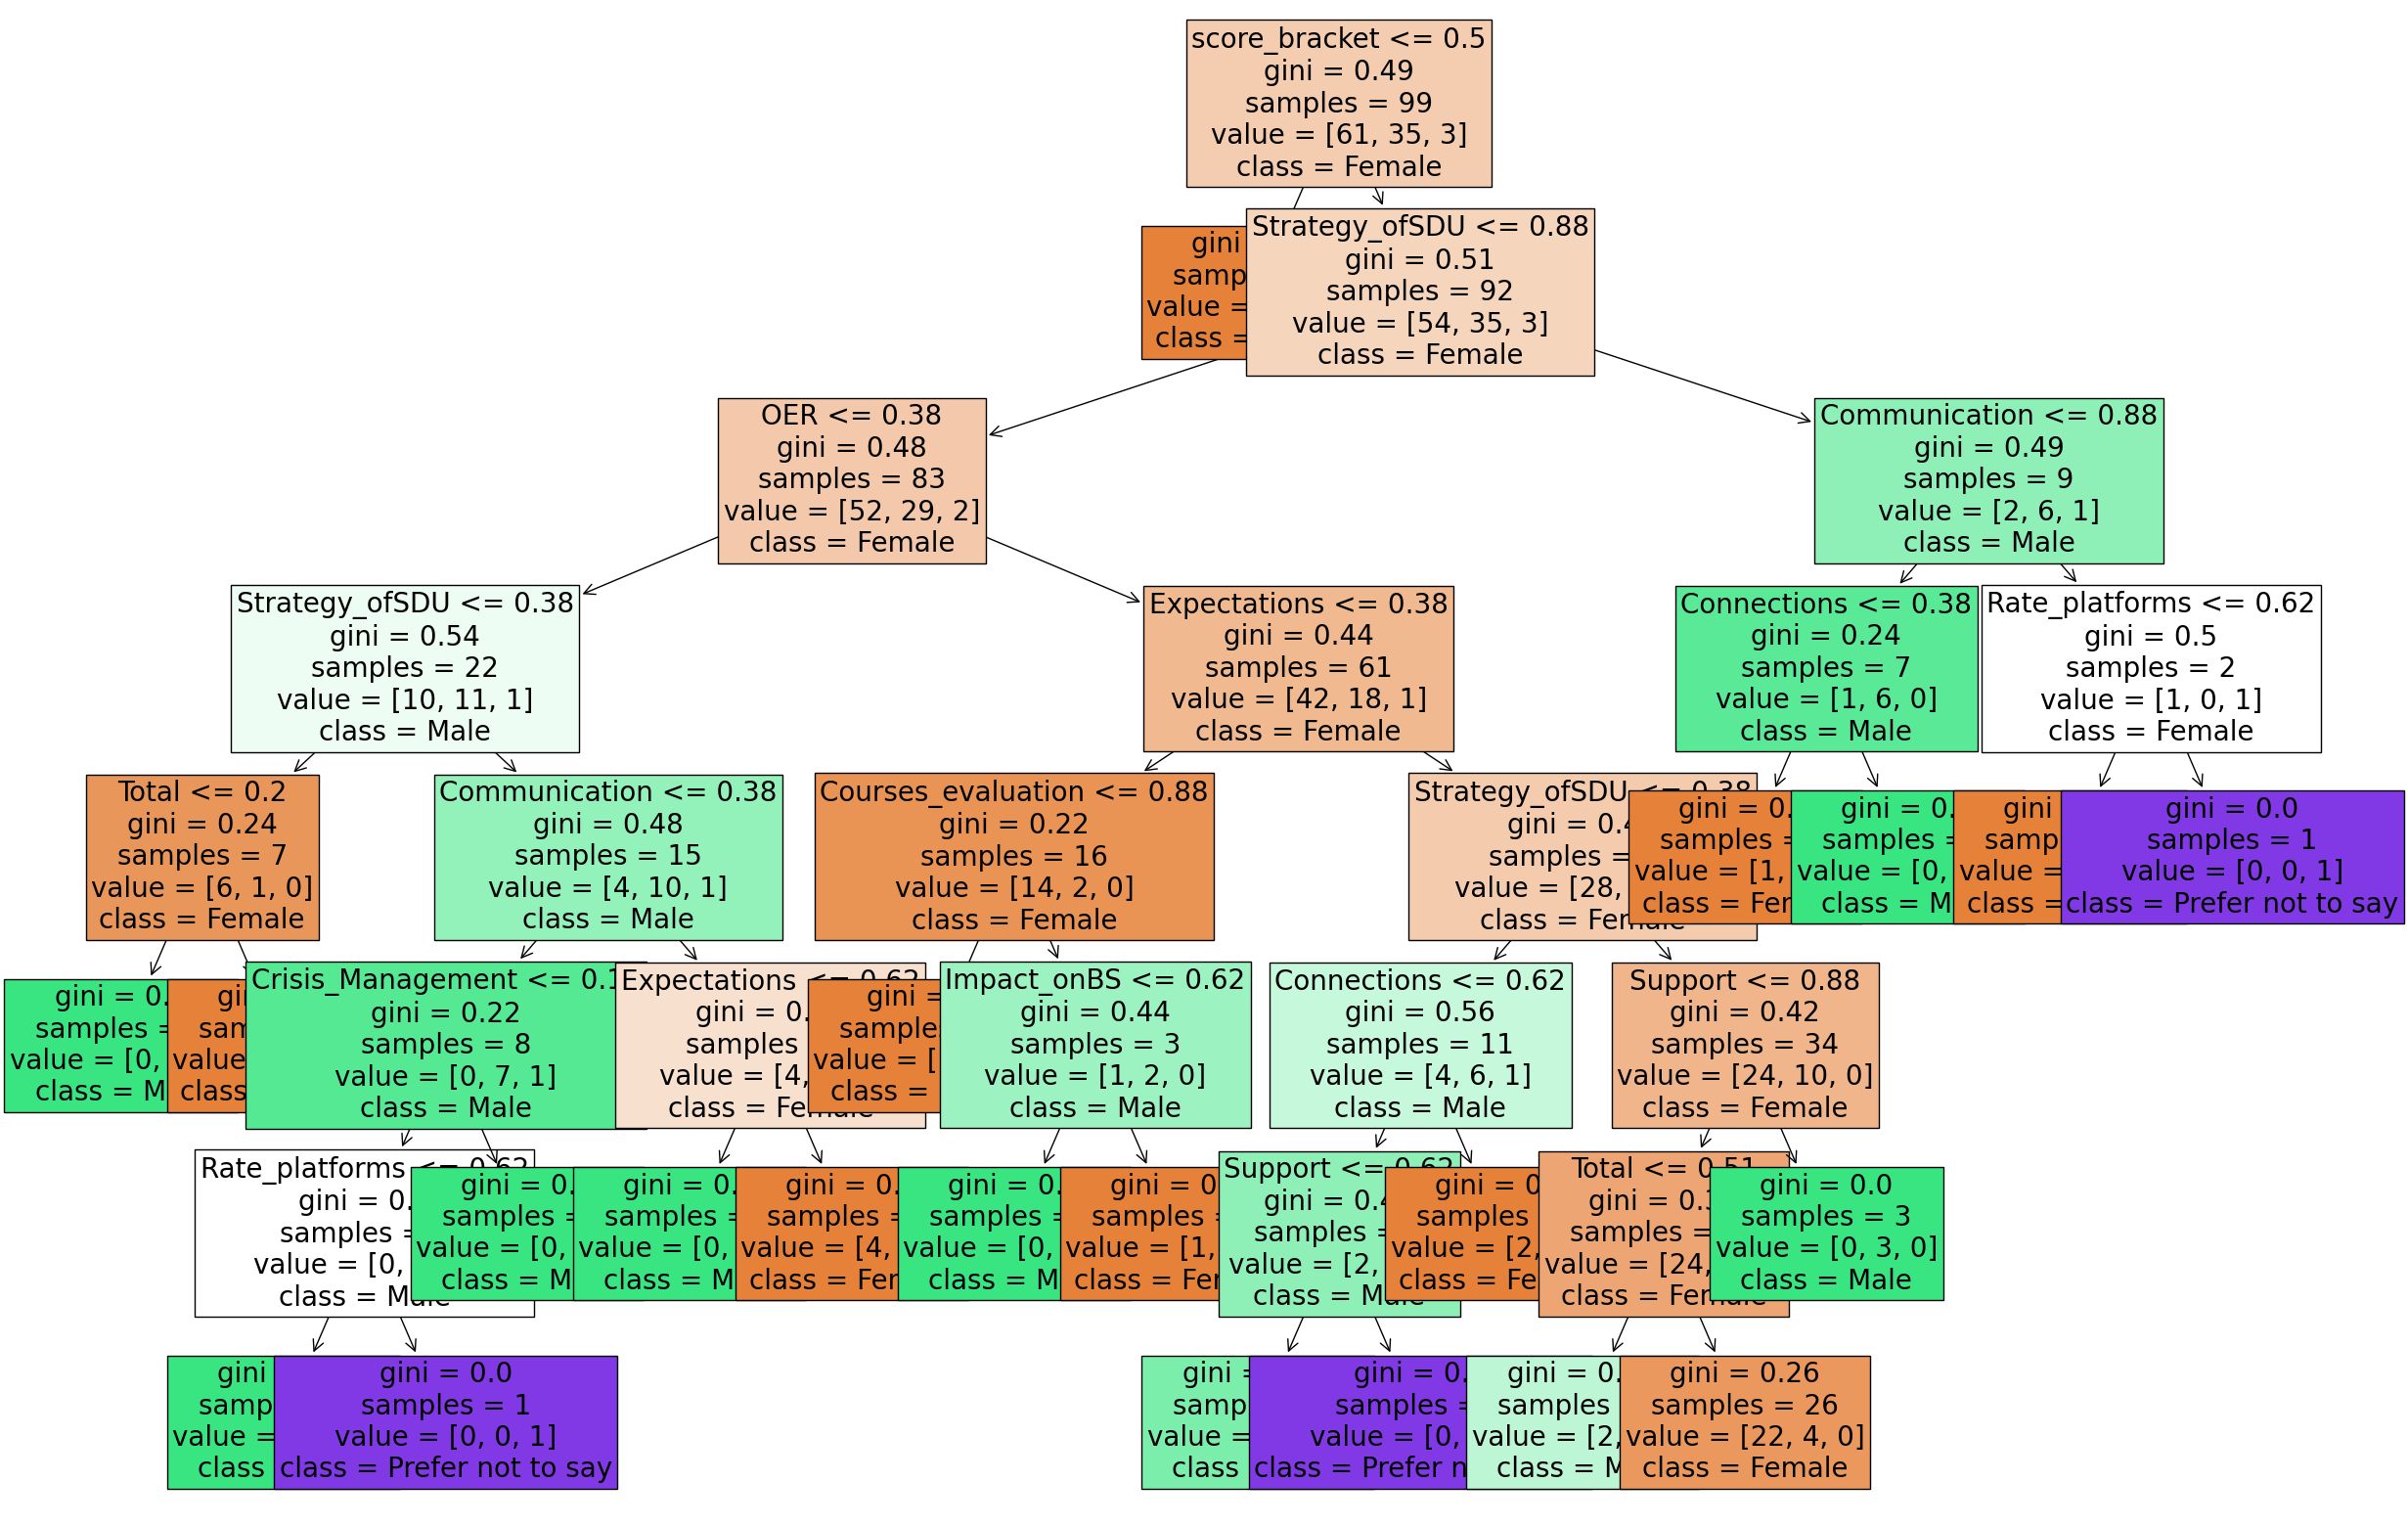

In [56]:
plt.figure(figsize=(30,20))
plot_tree(tree, feature_names=feature_cols, class_names=['Female', 'Male', 'Prefer not to say'], 
          filled=True, precision=2, fontsize=20)
plt.show()

### 3.6 Evaluation metrics

In [57]:
y_pred = tree.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy', accuracy)

Accuracy 0.6363636363636364


In [59]:
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision', precision)

Precision 0.6623376623376623


In [60]:
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall', recall)

Recall 0.6363636363636364


In [61]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.36363636363636365


In [62]:
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.38888888888888884


In [63]:
confusion_mat = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

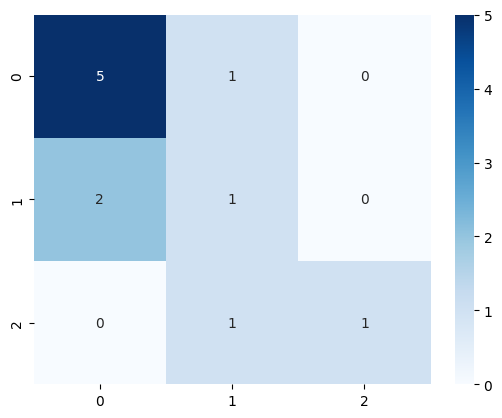

In [64]:
sns.heatmap(confusion_mat, annot=True, cmap='Blues')

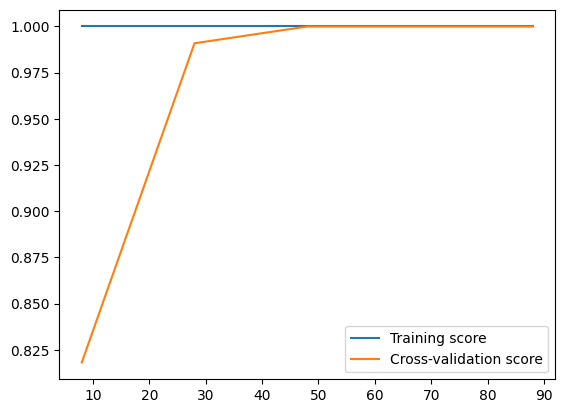

In [65]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(tree, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend(loc='best')
plt.show()

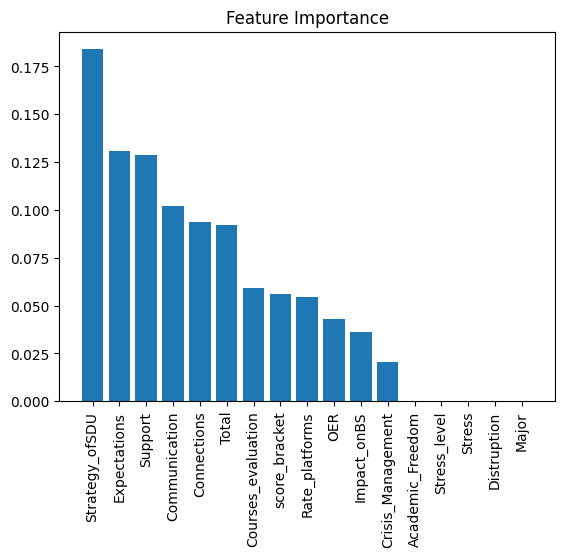

In [66]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)

plt.show()

# 4. Supervised learning classifier-KNN

In [4]:
DATA_PATH1 = 'Totals.csv'
df1 = pd.read_csv(DATA_PATH1)
df1.sample()

Timestamp  \
54  5/3/2023 16:20:48   

   I agree to participate for the purpose of the research study.  \
54                                                Yes              

   1. Your gender: 2. Your major of studying:  \
54          Female                 Management   

    How would you evaluate the impact of COVID-19 on business school faculty?  \
54                                                  5                           

    Has the COVID-19 pandemic disrupted the learning process at your institution?  \
54                                                  5                               

    How would you evaluate the Covid-19 crisis management at your institution? *Crisis management-the process by which a business or other organization deals with a sudden emergency situation.  \
54                                                  5                                                                                                                                              

    Was communication among and between all staff (academic and administrative) and students effective during the pandemic?   \
54                                                  2                                                                          

    Has the institution's strategy changed to reflect the impact of the pandemic?  \
54                                                  2                               

    Online learning was stressful  \
54                           True   

    How stressful was Online Education for you?  \
54                                            3   

    How would you evaluate the academic programs offered by your institution?  \
54                                                  1                           

    To what extent has the online learning impacted your experience as a student of SDU?    \
54                                                  1                                        

    In light of the pandemic, what were the dynamics in terms of connection growth among your groupmates?    \
54                                                  1                                                         

    What was the overall effect of the online education on your academic freedom?  * Academic freedom means that both faculty members and students can engage in intellectual debate without fear of censorship or retaliation.  \
54                                                  1                                                                                                                                                                             

    How would you rate use of online learning in SDU's BS?  \
54                                                  1        

    How effective for you was use of open educational resources? * OER can include textbooks, course materials and full courses, modules, streaming videos, tests, software, and any other tools, materials, or techniques used to support access to knowledge.  \
54                                                  2                                                                                                                                                                                                             

    How often did your institution support students without the necessary access to remote learning?     \
54                                                  2                                                     

    Total  
54     31

In [5]:
a = pd.DataFrame(df1)
a.columns = ['Timestamp', 'Agreements','Gender', 'Major', 'Impact_onBS','Distruption','Crisis_Management','Communication', 'Strategy_ofSDU','Stress','Stress_level','Courses_evaluation','Expectations','Connections','Academic_Freedom','Rate_platforms','OER','Support', 'Total']
a['Agreements'].fillna(value = 'Yes', inplace = True)
a

Timestamp Agreements  Gender                 Major  Impact_onBS  \
0     4/16/2023 1:38:41        Yes  Female  Accounting and audit            5   
1     4/16/2023 1:52:35        Yes  Female     Digital marketing            4   
2    4/16/2023 19:12:39        Yes  Female  Accounting and audit            3   
3    4/18/2023 14:04:32        Yes  Female            Management            5   
4    4/18/2023 14:09:33        Yes    Male  Accounting and audit            5   
..                  ...        ...     ...                   ...          ...   
105   5/6/2023 12:15:16        Yes    Male            Management            2   
106   5/6/2023 12:30:19        Yes  Female             Economics            3   
107   5/6/2023 13:00:08        Yes  Female     Digital marketing            1   
108   5/6/2023 13:38:51        Yes  Female     Digital marketing            4   
109   5/6/2023 18:25:40        Yes    Male               Finance            4   

     Distruption  Crisis_Management  Communication  Strategy_ofSDU  Stress  \
0              5                  3              1               3    True   
1              4                  2              3               2    True   
2              4                  4              4               3    True   
3              3                  3              3               3    True   
4              3                  3              5               2    True   
..           ...                ...            ...             ...     ...   
105            1                  3              3               2    True   
106            4                  2              2               2    True   
107            4                  2              3               3    True   
108            5                  4              4               4    True   
109            4                  4              2               3    True   

     Stress_level  Courses_evaluation  Expectations  Connections  \
0               5                   2             5            2   
1               4                   1             3            4   
2               3                   4             4            3   
3               3                   3             3            3   
4               3                   4             2            2   
..            ...                 ...           ...          ...   
105             3                   2             5            2   
106             4                   2             2            2   
107             3                   3             3            3   
108             5                   1             4            4   
109             4                   4             4            3   

     Academic_Freedom  Rate_platforms  OER  Support  Total  
0                   2               2    3        1     39  
1                   1               4    3        3     38  
2                   3               4    3        4     46  
3                   3               3    3        3     41  
4                   2               4    2        4     41  
..                ...             ...  ...      ...    ...  
105                 2               4    3        3     35  
106                 2               3    3        1     32  
107                 3               3    3        3     37  
108                 2               4    4        3     48  
109                 5               5    5        5     52  

[110 rows x 19 columns]

In [6]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [21]:
x_list = ['Total','Impact_onBS','Distruption','Crisis_Management']
X = a[x_list]
y = a['Stress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.7272727272727273


In [22]:
test_means = []
test_stds = []
train_means = []

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

knn_num = range(1,20)

for x in knn_num:
    classifier = KNeighborsClassifier(n_neighbors=x,p=2)       
    scores = cross_validate(estimator=classifier,
                            X=X,
                            y=y,
                            cv=5,
                            return_train_score=True)
    test_means.append(np.mean(scores['test_score']))
    test_stds.append(np.std(scores['test_score']))
    train_means.append(np.mean(scores['train_score']))

In [23]:
np.mean(test_means)

0.6937799043062199

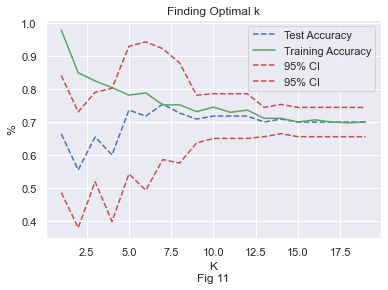

In [24]:
plt.plot(knn_num, test_means, 'b--', label='Test Accuracy')
plt.plot(knn_num, train_means, 'g-', label='Training Accuracy')
plt.plot(knn_num, np.array(test_means) + 2*np.array(test_stds), 'r--', label='95% CI')
plt.plot(knn_num, np.array(test_means) - 2*np.array(test_stds), 'r--', label='95% CI')
plt.title('Finding Optimal k')
plt.xlabel('K\nFig 11')
plt.ylabel('%')
plt.legend()

In [26]:
test_means = []
test_stds = []
train_means = []

population_size = len(df)

sample_sizes = list(range(20,len(a),20))

for sample_size in sample_sizes:
    classifier = KNeighborsClassifier(n_neighbors=5,p=2)       
    scores = cross_validate(estimator=classifier,
                            X=X[:sample_size],
                            y=y[:sample_size],
                            cv=5,
                            return_train_score=True)
    test_means.append(np.mean(scores['test_score']))
    test_stds.append(np.std(scores['test_score']))
    train_means.append(np.mean(scores['train_score']))

Text(0, 0.5, '%')

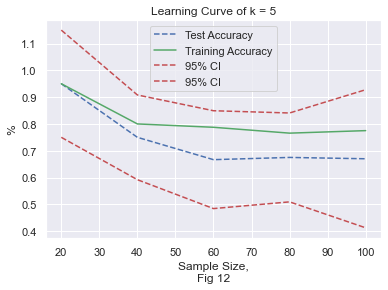

In [27]:
plt.plot(sample_sizes, test_means, 'b--', label='Test Accuracy')
plt.plot(sample_sizes, train_means, 'g-', label='Training Accuracy')
plt.plot(sample_sizes, np.array(test_means) + 2*np.array(test_stds), 'r--', label='95% CI')
plt.plot(sample_sizes, np.array(test_means) - 2*np.array(test_stds), 'r--', label='95% CI')
plt.title('Learning Curve of k = 5')
plt.legend()
plt.xlabel('Sample Size,\nFig 12')
plt.ylabel('%')

Notice that the distance between the testing and training error is very small as 
this signifies that overfitting is not happening. Also, the training and testing accuracy converges at a high percentage, so this also is not a case of underfitting. So, by finding optimal k we avoided over/underfitting.

# 5. SVM

In [62]:
data = pd.DataFrame(a)
data.drop(['Timestamp','Agreements','Gender','Major'],axis=1,inplace=True)
data.sample()

Impact_onBS  Distruption  Crisis_Management  Communication  \
71            5            5                  3              4   

    Strategy_ofSDU  Stress  Stress_level  Courses_evaluation  Expectations  \
71               3   False             1                   2             4   

    Connections  Academic_Freedom  Rate_platforms  OER  Support  Total  
71            4                 5               3    2        4     45

In [63]:
data.Stress=[1 if each==True else 0 for each in data.Stress]

In [64]:
y=data.Stress.values
x_data=data.drop(['Stress'],axis=1)

In [65]:
data.describe()

Impact_onBS  Distruption  Crisis_Management  Communication  \
count   110.000000   110.000000         110.000000     110.000000   
mean      3.409091     3.500000           3.109091       3.018182   
std       1.159686     1.139371           1.016790       1.091937   
min       1.000000     1.000000           1.000000       1.000000   
25%       3.000000     3.000000           3.000000       2.000000   
50%       3.500000     4.000000           3.000000       3.000000   
75%       4.000000     4.000000           4.000000       4.000000   
max       5.000000     5.000000           5.000000       5.000000   

       Strategy_ofSDU      Stress  Stress_level  Courses_evaluation  \
count      110.000000  110.000000     110.00000          110.000000   
mean         3.227273    0.700000       3.20000            3.218182   
std          1.046261    0.460355       1.21005            1.017118   
min          1.000000    0.000000       1.00000            1.000000   
25%          3.000000    0.000000       2.00000            3.000000   
50%          3.000000    1.000000       3.00000            3.000000   
75%          4.000000    1.000000       4.00000            4.000000   
max          5.000000    1.000000       5.00000            5.000000   

       Expectations  Connections  Academic_Freedom  Rate_platforms  \
count    110.000000   110.000000        110.000000      110.000000   
mean       3.163636     2.836364          3.000000        3.100000   
std        1.184977     1.207980          1.057954        1.083233   
min        1.000000     1.000000          1.000000        1.000000   
25%        2.000000     2.000000          2.000000        2.000000   
50%        3.000000     3.000000          3.000000        3.000000   
75%        4.000000     4.000000          4.000000        4.000000   
max        5.000000     5.000000          5.000000        5.000000   

              OER     Support       Total  
count  110.000000  110.000000  110.000000  
mean     3.109091    3.081818   40.972727  
std      1.103335    1.032782    7.045669  
min      1.000000    1.000000   13.000000  
25%      2.000000    3.000000   38.250000  
50%      3.000000    3.000000   41.000000  
75%      4.000000    4.000000   44.000000  
max      5.000000    5.000000   65.000000

In [66]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [68]:
alg_acc={}

In [72]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
alg_acc['svm']=svm.score(x_test,y_test)
print('Support Vector Machine test accuracy is:',svm.score(x_test,y_test))

Support Vector Machine test accuracy is: 1.0


Here is our mode is overvitting in order to solve this problem we need to drop more variables, so the model can perform better.

In [73]:
d = pd.DataFrame(a)
d.drop(['Timestamp','Agreements','Gender','Major','Stress_level','Courses_evaluation','Expectations','Connections','Academic_Freedom','Rate_platforms','OER','Support'],axis=1,inplace=True)
d.sample()

Impact_onBS  Distruption  Crisis_Management  Communication  \
75            3            4                  4              3   

    Strategy_ofSDU  Stress  Total  
75               3    True     42

In [74]:
d.Stress=[1 if each==True else 0 for each in d.Stress]

In [75]:
y=d.Stress.values
x_d=d.drop(['Stress'],axis=1)

In [76]:
d.describe()

Impact_onBS  Distruption  Crisis_Management  Communication  \
count   110.000000   110.000000         110.000000     110.000000   
mean      3.409091     3.500000           3.109091       3.018182   
std       1.159686     1.139371           1.016790       1.091937   
min       1.000000     1.000000           1.000000       1.000000   
25%       3.000000     3.000000           3.000000       2.000000   
50%       3.500000     4.000000           3.000000       3.000000   
75%       4.000000     4.000000           4.000000       4.000000   
max       5.000000     5.000000           5.000000       5.000000   

       Strategy_ofSDU      Stress       Total  
count      110.000000  110.000000  110.000000  
mean         3.227273    0.700000   40.972727  
std          1.046261    0.460355    7.045669  
min          1.000000    0.000000   13.000000  
25%          3.000000    0.000000   38.250000  
50%          3.000000    1.000000   41.000000  
75%          4.000000    1.000000   44.000000  
max          5.000000    1.000000   65.000000

In [77]:
x=(x_d-np.min(x_d))/(np.max(x_d)-np.min(x_d))

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [79]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
alg_acc['svm']=svm.score(x_test,y_test)
print('Support Vector Machine test accuracy is:',svm.score(x_test,y_test))

Support Vector Machine test accuracy is: 0.7272727272727273


As we can see that the dropping of the variables helped to optimize the model and now the accuracy is much better.

# Visualizations of main data

Text(0.5, 0, 'Students')

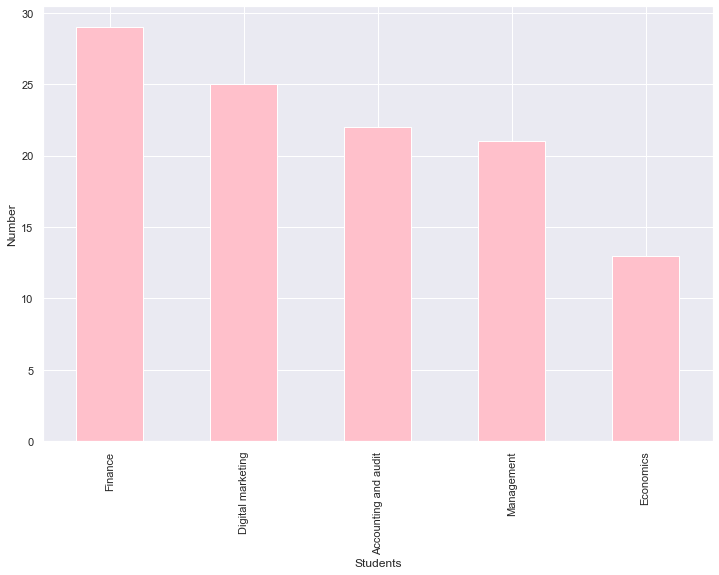

In [31]:
target_s = a['Major']
'There are {} unique major types'.format(target_s.nunique())
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
target_s.value_counts().plot(kind='bar', ax=ax, color='pink')
ax.set_ylabel('Number')
ax.set_xlabel('Students')

It could be concluded that in a survey among BS students prevailing ammount as expected was from Finance.
Finance	28 
Digital marketing	23 
Accounting and audit	22 
Management	21 
Economics	13 

In [32]:
top_df=a.groupby('Major')[['Total']].mean()
top_df

Total
Major                          
Accounting and audit  39.500000
Digital marketing     43.800000
Economics             40.923077
Finance               39.724138
Management            40.904762

array([<AxesSubplot:ylabel='Total'>], dtype=object)

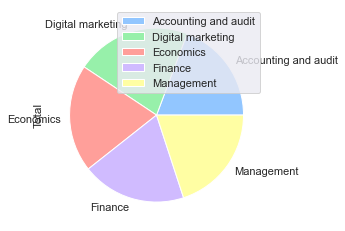

In [33]:
top_df.plot.pie(subplots=True)

In [34]:
def mean_boxplot(cat, mean='Total', data=a):
    plt.figure(figsize=(15, 15))
    sorted_index = (data.groupby(cat)[[mean]].median().sort_values(by=mean, ascending=False).index)
    sns.boxplot(y=cat, x=mean, data=data, orient='h', order=sorted_index).set( title=f'{cat[0].upper() + cat[1:]} vs Mean')

In [35]:
source_df = pd.DataFrame(a.groupby('Expectations')[['Courses_evaluation']].mean().sort_values(by='Courses_evaluation', ascending=False).reset_index())
source_df

Expectations  Courses_evaluation
0             5            3.625000
1             4            3.233333
2             3            3.172414
3             2            3.076923
4             1            3.000000

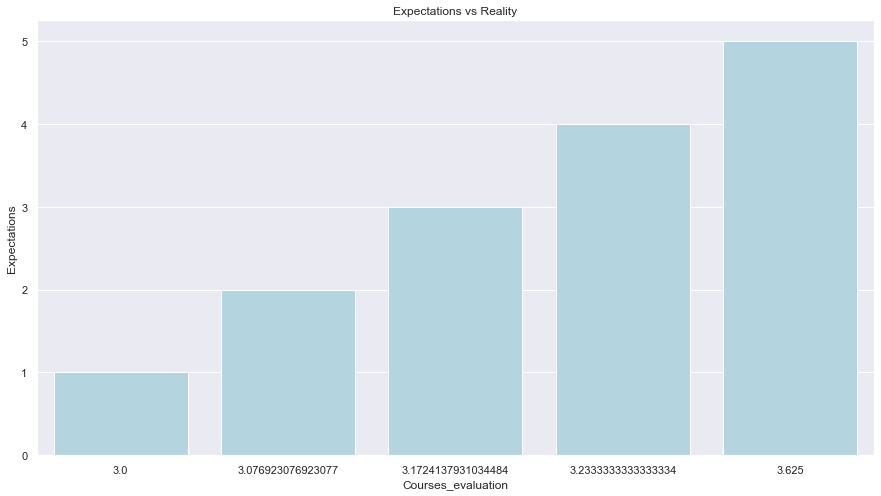

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Courses_evaluation', y='Expectations', data=source_df, ci=None, color='#ADD8E6').set(title='Expectations vs Reality');

Barplot above illustrates the clash between expectations and courses evaluation given by studenta, as it can be observed the evaluations were much lower that the expectations anticipated.

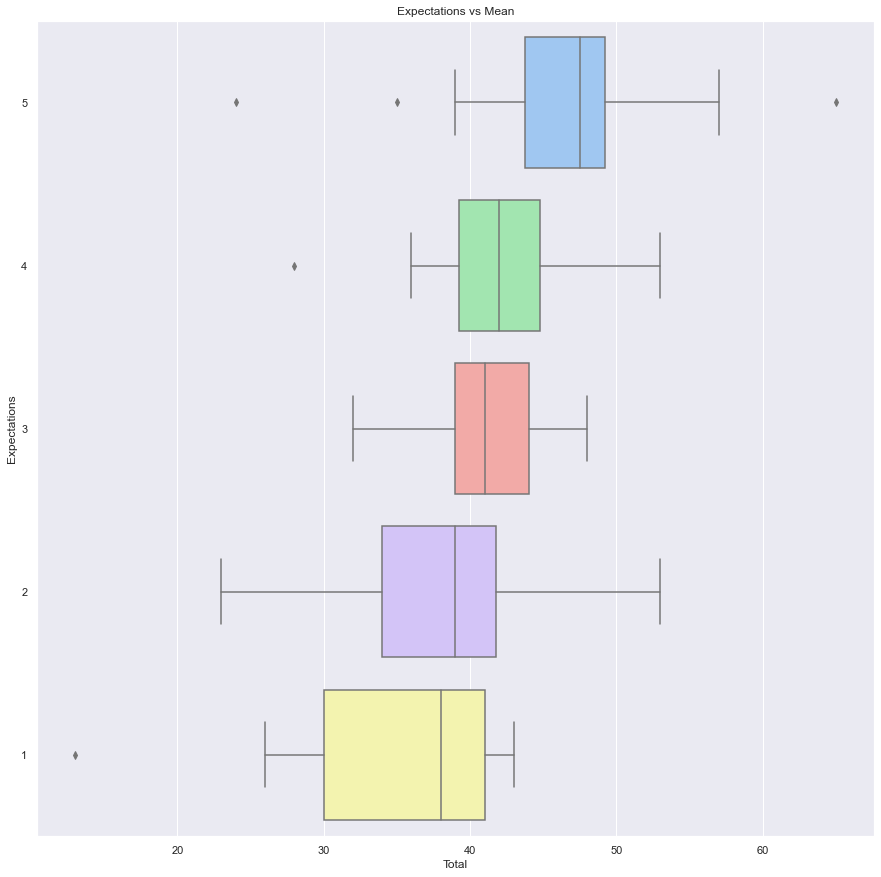

In [38]:
mean_boxplot('Expectations')

Above figure illustrates that the expectations of the majority of the students were affected to a great extent, with only couple of outliers stationg that their expectations weren;t affected at all.

In [39]:
rating = a['Rate_platforms']
rank = a['OER']
expectation = a['Expectations']
Total = a['Total']

# combine into one df
relationship_df = pd.DataFrame(rating)

relationship_df['OER'] = rank
relationship_df['Expectations'] = expectation
relationship_df['Total'] = Total

relationship_df.head()

Rate_platforms  OER  Expectations  Total
0               2    3             5     39
1               4    3             3     38
2               4    3             4     46
3               3    3             3     41
4               4    2             2     41

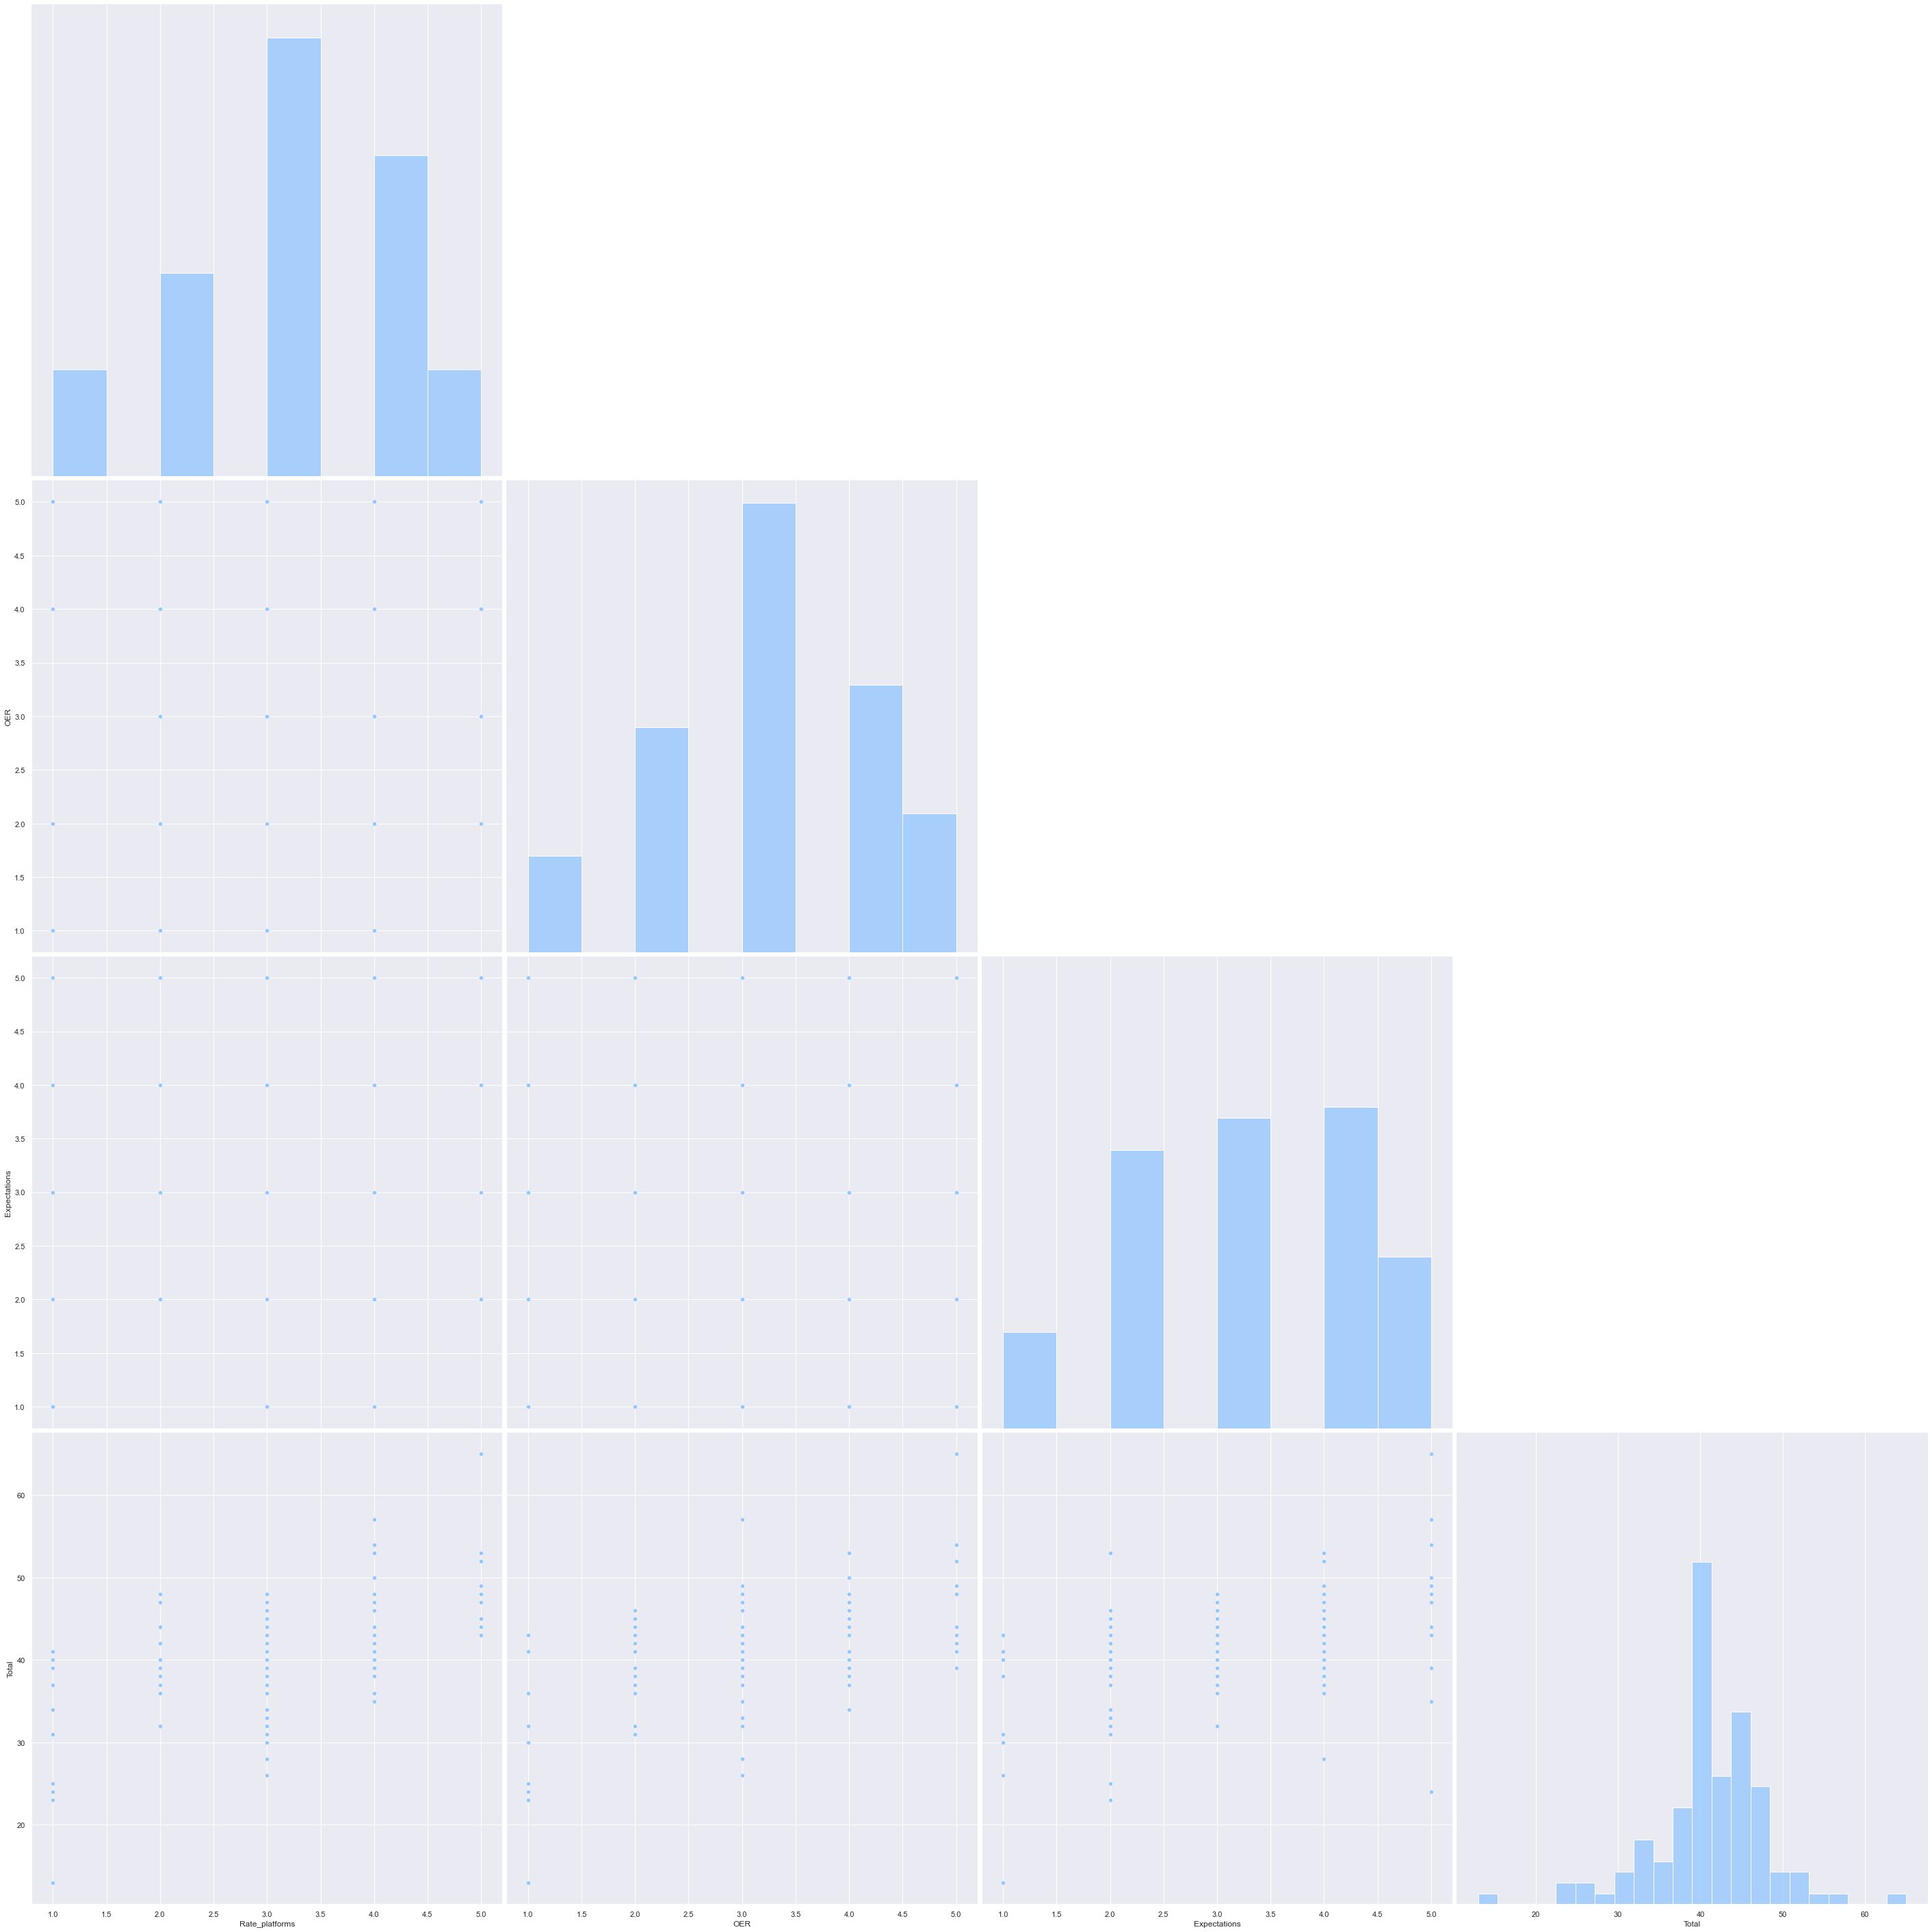

In [41]:
sns.pairplot(relationship_df, kind='scatter', height=10, corner=True)
plt.show()

In [42]:
relationship_df.corr()

Rate_platforms       OER  Expectations     Total
Rate_platforms        1.000000  0.236426      0.158670  0.560525
OER                   0.236426  1.000000      0.154631  0.511399
Expectations          0.158670  0.154631      1.000000  0.444478
Total                 0.560525  0.511399      0.444478  1.000000

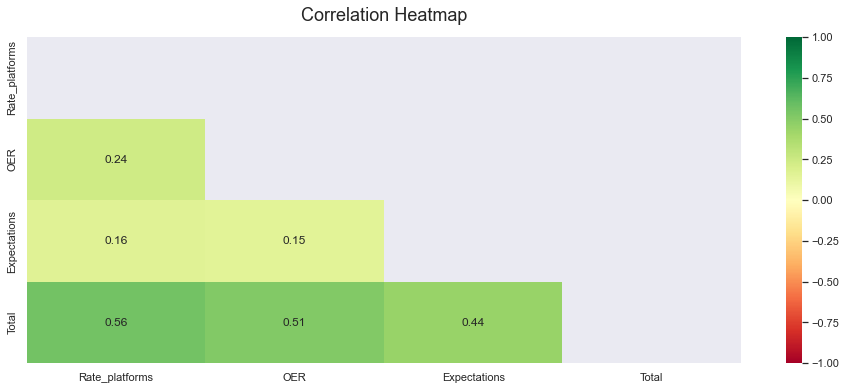

In [43]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(relationship_df.corr(), dtype=bool))
heatmap = sns.heatmap(relationship_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

It seems that ranking have strong correlations with total which is expected. There is also a positive correlation between online resources and raing of the platforms, which means the better online sources offered the higher the rating of the platforms.

In [44]:
start_date_df = pd.DataFrame(a.groupby('Timestamp')['Total'].mean())
start_date_df.describe()

Total
count  110.000000
mean    40.972727
std      7.045669
min     13.000000
25%     38.250000
50%     41.000000
75%     44.000000
max     65.000000

In [45]:
nep = start_date_df[start_date_df['Total'] != 0]
nep = nep.sort_values(by='Timestamp')
nep

Total
Timestamp                
4/16/2023 19:12:39   46.0
4/16/2023 1:38:41    39.0
4/16/2023 1:52:35    38.0
4/18/2023 14:04:32   41.0
4/18/2023 14:09:33   41.0
...                   ...
5/6/2023 12:15:16    35.0
5/6/2023 12:30:19    32.0
5/6/2023 13:00:08    37.0
5/6/2023 13:38:51    48.0
5/6/2023 18:25:40    52.0

[110 rows x 1 columns]

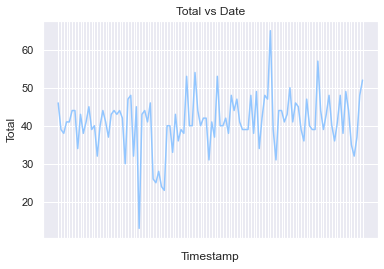

In [46]:
ax = sns.lineplot(x='Timestamp', y='Total', data=nep)
ax.set(xlabel='Timestamp')
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(title='Total vs Date')
plt.show()

The biggest amount of responses indicated on the 5th of May.

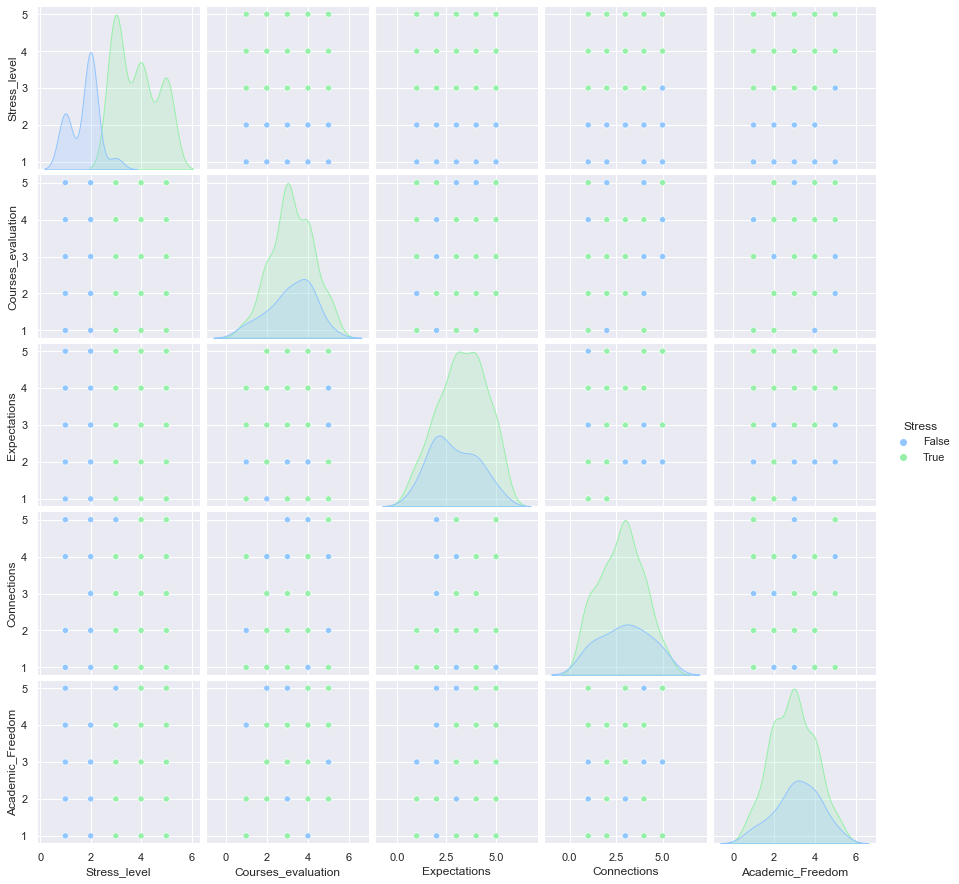

In [47]:
g=sns.pairplot(a[['Stress_level','Courses_evaluation','Expectations','Connections','Academic_Freedom','Stress']],hue='Stress')

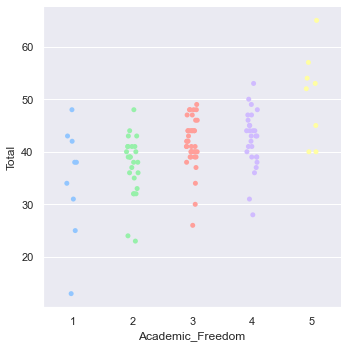

In [48]:
sns.catplot(data=a, x='Academic_Freedom', y='Total')

As we can see in above plot majority of the students stated that their academic freedom was average or better than average, which is understandable considering that during COVID-19 most of the online platforms were free and reachable. 

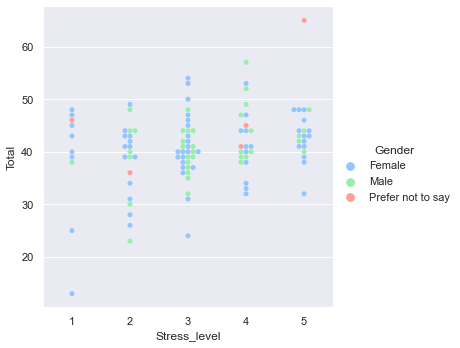

In [49]:
sns.catplot(data=a, x='Stress_level', y='Total', hue='Gender', kind='swarm')

Among students who responder as extremelly stressful vast majarity was Females, but when it comes to an average the proportion appears as quite balanced.

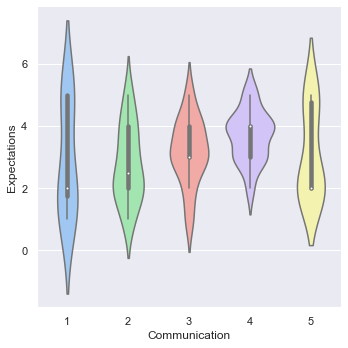

In [50]:
sns.catplot(data=a.sort_values('Communication'), x='Communication', y='Expectations', kind='violin',)

As the withd of the violins indicates the most frequent answers were 3 average and 4 a big deal, which means that communication inadequacy also means that the SDU didn't live up to expectations.

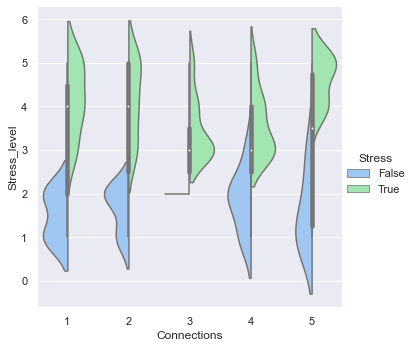

In [51]:
sns.catplot(data=a, x='Connections', y='Stress_level', hue='Stress', kind='violin', split=True,)

The responses to a stress varied between True being mostly 3 and above and False being 3 and below. Even with stress level being high the connections among students still were good.

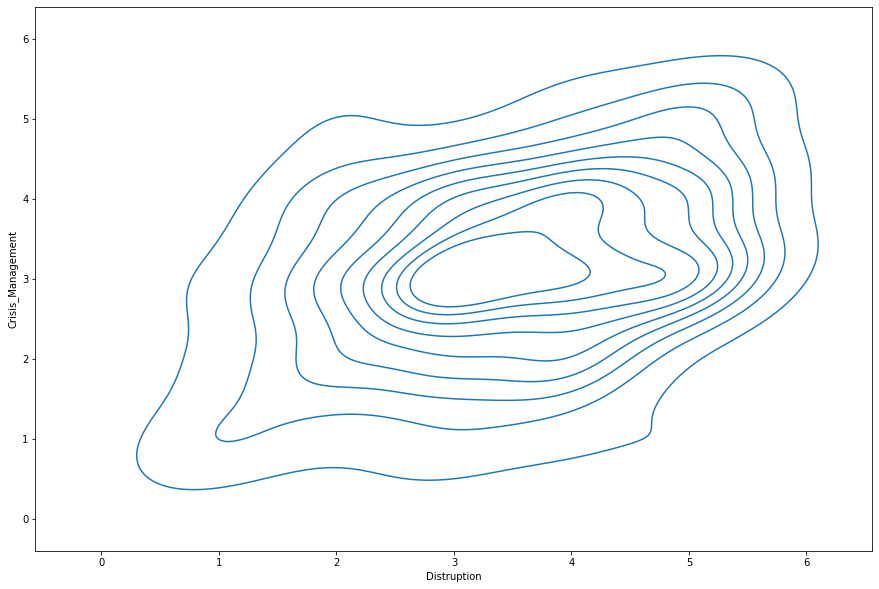

In [7]:
plt.figure(figsize=(15,10))
sns.kdeplot(a.Distruption, a.Crisis_Management)
plt.show()